In [1]:
# Set up the environment
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The goal
What are common features among colleges and universities that have closed in the last decade?
Using these features, is it possible to predict which schools are in danger of closing in the near future?
Are there steps that schools can take to mitigate the features which may lead to their closing?

# Data collection
The data come from the US Department of Education College Scorecard, which is available on Kaggle and from the US Department of Education at https://collegescorecard.ed.gov/data/.

In [2]:
# Load the csv files year by year; add a year column and merge them into one dataframe
filepath = "./data/raw/11_6609_bundle_archive/"
#year = ['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']
year = ['2010', '2011', '2012', '2013']

df_dict = {}

fields = ['OPEID','INSTNM','CITY', 'NUMBRANCH', 'PREDDEG', 'HIGHDEG', 'CONTROL','region', 'ADM_RATE',\
         'UGDS', 'CURROPER', 'NPT4_PUB', 'NPT4_PRIV', 'COSTT4_A', 'COSTT4_P','TUITFTE', 'INEXPFTE', 'AVGFACSAL', 'PFTFAC',\
         'C150_4', 'C150_L4','RET_FT4','RET_FTL4','RET_PT4','RET_PTL4','PCTFLOAN','UG25abv',\
         'COMP_ORIG_YR4_RT','WDRAW_ORIG_YR4_RT', 'ENRL_ORIG_YR4_RT', 'DEBT_MDN']

for yr in year:
    filename = filepath + "MERGED" + yr + "_PP.csv"
    print(filename)
    df_dict[yr] = pd.read_csv(filename, usecols=fields, low_memory=False)
    df_dict[yr]['Year'] = yr

./data/raw/11_6609_bundle_archive/MERGED2010_PP.csv
./data/raw/11_6609_bundle_archive/MERGED2011_PP.csv
./data/raw/11_6609_bundle_archive/MERGED2012_PP.csv
./data/raw/11_6609_bundle_archive/MERGED2013_PP.csv


In [3]:
data = pd.concat([df for df in df_dict.values()], ignore_index=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30686 entries, 0 to 30685
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OPEID              30686 non-null  object 
 1   INSTNM             30686 non-null  object 
 2   CITY               30686 non-null  object 
 3   NUMBRANCH          30686 non-null  int64  
 4   PREDDEG            30686 non-null  int64  
 5   HIGHDEG            30686 non-null  int64  
 6   CONTROL            30686 non-null  int64  
 7   region             30685 non-null  float64
 8   ADM_RATE           9183 non-null   float64
 9   UGDS               28093 non-null  float64
 10  CURROPER           30686 non-null  int64  
 11  NPT4_PUB           7470 non-null   float64
 12  NPT4_PRIV          16436 non-null  float64
 13  COSTT4_A           16485 non-null  float64
 14  COSTT4_P           10026 non-null  float64
 15  TUITFTE            29133 non-null  float64
 16  INEXPFTE           291

In [5]:
data.Year = data.Year.astype('int')

## Data organization
Create a file structure (and add work to GitHub repo)

In [6]:
#Create directories for various components of the project
#os.mkdir("data")
#os.mkdir("data/raw")
#os.mkdir("data/interim")
#os.mkdir("data/processed")
#os.mkdir("data/external")
#os.mkdir("figures")
#os.mkdir("models")

Filter data to keep all closed schools (from 2010-2013) and most recent data (2013) for currently operating schools.

In [7]:
closed=data.loc[data.CURROPER==False]
operate = data.loc[data.CURROPER==True]
current = operate.loc[operate.Year > 2012]
data = current.append(closed)

In [8]:
# Look at basic info about the dataframe - column names, summary information
data.shape

(10200, 32)

In [9]:
data.CURROPER.value_counts()

1    7441
0    2759
Name: CURROPER, dtype: int64

In [10]:
data.sort_index(inplace=True)

In [11]:
data.head()

OPEID                                   INSTNM      CITY  NUMBRANCH  \
67  02295000                  Everest College-Phoenix   Phoenix          2   
69  01293700     Empire Beauty School-Paradise Valley   Phoenix          1   
70  00886500              Empire Beauty School-Tucson    Tucson          2   
71  00107000  Thunderbird School of Global Management  Glendale          1   
79  01084700             Arizona Automotive Institute  Glendale          1   

    PREDDEG  HIGHDEG  CONTROL  region  ADM_RATE    UGDS  ...  RET_FTL4  \
67        1        3        3     6.0    0.4465  5662.0  ...       NaN   
69        1        1        3     6.0       NaN    86.0  ...    0.6087   
70        1        1        3     6.0       NaN   149.0  ...    0.5000   
71        1        4        2     6.0       NaN     2.0  ...       NaN   
79        1        1        3     6.0       NaN  1734.0  ...    0.5875   

    RET_PT4  RET_PTL4  PCTFLOAN  UG25abv   COMP_ORIG_YR4_RT  \
67      0.0       NaN    0.8226      NaN     0.321678321678   
69      NaN    0.2500    0.9884      NaN     0.435897435897   
70      NaN    0.7619    0.9590      NaN     0.653958944282   
71      NaN       NaN    0.0000      NaN  PrivacySuppressed   
79      NaN       NaN    0.8096      NaN     0.533596837945   

    WDRAW_ORIG_YR4_RT   ENRL_ORIG_YR4_RT           DEBT_MDN  Year  
67     0.294342021615     0.012078830261               9495  2010  
69      0.25641025641                  0              10556  2010  
70     0.196480938416  PrivacySuppressed             9864.5  2010  
71                  0                  0  PrivacySuppressed  2010  
79     0.355731225296                  0              13000  2010  

[5 rows x 32 columns]

In [12]:
data.reset_index(inplace=True, drop=True)

In [13]:
data.head()

OPEID                                   INSTNM      CITY  NUMBRANCH  \
0  02295000                  Everest College-Phoenix   Phoenix          2   
1  01293700     Empire Beauty School-Paradise Valley   Phoenix          1   
2  00886500              Empire Beauty School-Tucson    Tucson          2   
3  00107000  Thunderbird School of Global Management  Glendale          1   
4  01084700             Arizona Automotive Institute  Glendale          1   

   PREDDEG  HIGHDEG  CONTROL  region  ADM_RATE    UGDS  ...  RET_FTL4  \
0        1        3        3     6.0    0.4465  5662.0  ...       NaN   
1        1        1        3     6.0       NaN    86.0  ...    0.6087   
2        1        1        3     6.0       NaN   149.0  ...    0.5000   
3        1        4        2     6.0       NaN     2.0  ...       NaN   
4        1        1        3     6.0       NaN  1734.0  ...    0.5875   

   RET_PT4  RET_PTL4  PCTFLOAN  UG25abv   COMP_ORIG_YR4_RT  WDRAW_ORIG_YR4_RT  \
0      0.0       NaN    0.8226      NaN     0.321678321678     0.294342021615   
1      NaN    0.2500    0.9884      NaN     0.435897435897      0.25641025641   
2      NaN    0.7619    0.9590      NaN     0.653958944282     0.196480938416   
3      NaN       NaN    0.0000      NaN  PrivacySuppressed                  0   
4      NaN       NaN    0.8096      NaN     0.533596837945     0.355731225296   

    ENRL_ORIG_YR4_RT           DEBT_MDN  Year  
0     0.012078830261               9495  2010  
1                  0              10556  2010  
2  PrivacySuppressed             9864.5  2010  
3                  0  PrivacySuppressed  2010  
4                  0              13000  2010  

[5 rows x 32 columns]

In [14]:
data.columns

Index(['OPEID', 'INSTNM', 'CITY', 'NUMBRANCH', 'PREDDEG', 'HIGHDEG', 'CONTROL',
       'region', 'ADM_RATE', 'UGDS', 'CURROPER', 'NPT4_PUB', 'NPT4_PRIV',
       'COSTT4_A', 'COSTT4_P', 'TUITFTE', 'INEXPFTE', 'AVGFACSAL', 'PFTFAC',
       'C150_4', 'C150_L4', 'RET_FT4', 'RET_FTL4', 'RET_PT4', 'RET_PTL4',
       'PCTFLOAN', 'UG25abv', 'COMP_ORIG_YR4_RT', 'WDRAW_ORIG_YR4_RT',
       'ENRL_ORIG_YR4_RT', 'DEBT_MDN', 'Year'],
      dtype='object')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OPEID              10200 non-null  object 
 1   INSTNM             10200 non-null  object 
 2   CITY               10200 non-null  object 
 3   NUMBRANCH          10200 non-null  int64  
 4   PREDDEG            10200 non-null  int64  
 5   HIGHDEG            10200 non-null  int64  
 6   CONTROL            10200 non-null  int64  
 7   region             10200 non-null  float64
 8   ADM_RATE           2491 non-null   float64
 9   UGDS               9274 non-null   float64
 10  CURROPER           10200 non-null  int64  
 11  NPT4_PUB           2040 non-null   float64
 12  NPT4_PRIV          6085 non-null   float64
 13  COSTT4_A           4888 non-null   float64
 14  COSTT4_P           3773 non-null   float64
 15  TUITFTE            9615 non-null   float64
 16  INEXPFTE           961

In [16]:
data.nunique()

OPEID                9211
INSTNM               8137
CITY                 2593
NUMBRANCH              37
PREDDEG                 5
HIGHDEG                 5
CONTROL                 3
region                 10
ADM_RATE             1889
UGDS                 3203
CURROPER                2
NPT4_PUB             1894
NPT4_PRIV            5392
COSTT4_A             4432
COSTT4_P             3413
TUITFTE              7623
INEXPFTE             6614
AVGFACSAL            3920
PFTFAC               2595
C150_4               2050
C150_L4              2975
RET_FT4              1602
RET_FTL4             2185
RET_PT4               419
RET_PTL4             1196
PCTFLOAN             4928
UG25abv              4670
COMP_ORIG_YR4_RT     1073
WDRAW_ORIG_YR4_RT     945
ENRL_ORIG_YR4_RT      190
DEBT_MDN             2709
Year                    4
dtype: int64

In [17]:
data.describe().T

count          mean           std        min          25%  \
NUMBRANCH  10200.0      8.232549     23.080395     1.0000      1.00000   
PREDDEG    10200.0      1.679020      1.022787     0.0000      1.00000   
HIGHDEG    10200.0      2.035196      1.293803     0.0000      1.00000   
CONTROL    10200.0      2.335882      0.815291     1.0000      2.00000   
region     10200.0      4.613235      2.165865     0.0000      3.00000   
ADM_RATE    2491.0      0.685507      0.213003     0.0000      0.55140   
UGDS        9274.0   1907.782726   4854.761452     0.0000    107.00000   
CURROPER   10200.0      0.729510      0.444235     0.0000      0.00000   
NPT4_PUB    2040.0   9526.236275   4598.292750 -1749.0000   6257.75000   
NPT4_PRIV   6085.0  17777.175349   7182.915420 -5029.0000  13069.00000   
COSTT4_A    4888.0  24228.831424  11519.387183  3368.0000  14850.50000   
COSTT4_P    3773.0  19654.668699   7340.194730     0.0000  14918.00000   
TUITFTE     9615.0   9783.645554   8192.678798     0.0000   4568.50000   
INEXPFTE    9615.0   6559.140302   9171.044556     0.0000   2915.50000   
AVGFACSAL   5556.0   5682.702664   2258.729791   269.0000   4064.75000   
PFTFAC      4895.0      0.545651      0.309996     0.0000      0.27880   
C150_4      2703.0      0.459638      0.218880     0.0000      0.30430   
C150_L4     5482.0      0.573337      0.246258     0.0000      0.39745   
RET_FT4     2629.0      0.672442      0.212386     0.0000      0.57350   
RET_FTL4    5523.0      0.684087      0.178297     0.0000      0.57140   
RET_PT4     1612.0      0.446156      0.296698     0.0000      0.25000   
RET_PTL4    2995.0      0.568122      0.264020     0.0000      0.38685   
PCTFLOAN    9214.0      0.555778      0.288094     0.0000      0.38155   
UG25abv     7743.0      0.431308      0.226830     0.0005      0.26800   
Year       10200.0   2012.504510      0.976727  2010.0000   2013.00000   

                   50%           75%       max  
NUMBRANCH      1.00000      3.000000     141.0  
PREDDEG        1.00000      3.000000       4.0  
HIGHDEG        2.00000      3.000000       4.0  
CONTROL        3.00000      3.000000       3.0  
region         5.00000      6.000000       9.0  
ADM_RATE       0.70780      0.844750       1.0  
UGDS         335.00000   1394.750000  166816.0  
CURROPER       1.00000      1.000000       1.0  
NPT4_PUB    8773.50000  12324.000000   27199.0  
NPT4_PRIV  18048.00000  22206.000000   87570.0  
COSTT4_A   23248.00000  29581.750000   74473.0  
COSTT4_P   18547.00000  23901.000000   89422.0  
TUITFTE     8705.00000  12942.000000  207213.0  
INEXPFTE    4850.00000   7378.000000  307089.0  
AVGFACSAL   5430.00000   6947.000000   23611.0  
PFTFAC         0.50270      0.840150       1.0  
C150_4         0.45140      0.607800       1.0  
C150_L4        0.61345      0.756550       1.0  
RET_FT4        0.70830      0.816000       1.0  
RET_FTL4       0.69230      0.809500       1.0  
RET_PT4        0.43060      0.625000       1.0  
RET_PTL4       0.53330      0.777800       1.0  
PCTFLOAN       0.62370      0.779175       1.0  
UG25abv        0.42860      0.591350       1.0  
Year        2013.00000   2013.000000    2013.0

## Explore data types 
Many of the columns that I expected to be numerical data were actually classifed as strings. I tried to convert them to numbers, but got an error message, so I explored the content of the colummns and the data dictionary to see what the problem was.

For privacy reasons, some of the columns include data is coded as "PrivacySupressed".

In [18]:
# Look at individual column information to assess and assign data types
print((data.COMP_ORIG_YR4_RT.value_counts()/len(data.COMP_ORIG_YR4_RT)) *100)
print((data.COMP_ORIG_YR4_RT.isnull().sum() /len(data.COMP_ORIG_YR4_RT)) *100)

PrivacySuppressed    3.068627
0                    0.754902
0.201995114963       0.264706
0.661157024793       0.254902
0.227173905346       0.254902
                       ...   
0.366515837104       0.009804
0.083955223881       0.009804
0.361386138614       0.009804
0.325966850829       0.009804
0.634246575342       0.009804
Name: COMP_ORIG_YR4_RT, Length: 1073, dtype: float64
77.8921568627451


In [19]:
# Replace "PrivacySuppressed" with null values (NaN)
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].str.replace("PrivacySuppressed", "NaN")

## Combine columns

There are several columns with the same information for different categories of schools (Public vs Private, Academic Year vs Annual Year). Each of the individual columns is missing a lot of data, but there would be less missing data if they were combined.

In [20]:
#Compare Net Price columns for private and public, to see if they can be combined into one column.
net_price = data[['NPT4_PUB', 'NPT4_PRIV']]
not_null = net_price.notnull()
eitherdf = net_price.loc[(not_null['NPT4_PUB'])|(not_null['NPT4_PRIV'])]

take_full = lambda s1, s2: s1 if np.isnan(s2) else s2

data['NetPrice'] = data['NPT4_PUB'].combine(data['NPT4_PRIV'], take_full)
data['Cost'] = data['COSTT4_P'].combine(data['COSTT4_A'], take_full)

In [21]:
data['NetPrice'].loc[data['NetPrice'].notnull()].shape

(8125,)

In [22]:
data['Cost'].loc[data['Cost'].notnull()].shape

(8661,)

## Percentage of null values per column

In [23]:
# Look at percentage of null values per column
nas=pd.DataFrame(data.isnull().sum().sort_values(ascending=False)/len(data),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

percent
OPEID              0.908627
RET_PT4            0.841961
NPT4_PUB           0.800000
ENRL_ORIG_YR4_RT   0.778922
WDRAW_ORIG_YR4_RT  0.778922
COMP_ORIG_YR4_RT   0.778922
ADM_RATE           0.755784
RET_FT4            0.742255
C150_4             0.735000
RET_PTL4           0.706373
COSTT4_P           0.630098
COSTT4_A           0.520784
PFTFAC             0.520098
C150_L4            0.462549
RET_FTL4           0.458529
AVGFACSAL          0.455294
NPT4_PRIV          0.403431
UG25abv            0.240882
NetPrice           0.203431
Cost               0.150882
PCTFLOAN           0.096667
UGDS               0.090784
DEBT_MDN           0.089314
TUITFTE            0.057353
INEXPFTE           0.057353

In [24]:
# Get a list of columns with > 90% NAN values
to_drop = [column for column in data.columns if (data[column].isnull().sum()/len(data[column]) > 0.90)]

print("Columns to drop include: ", to_drop)

Columns to drop include:  ['OPEID']


My first attempt at data wrangling had many colums with missing values. The original data wrangling and exploratory data analysis led me to refine the list of colums to import, which means there are no longer any numerical columms with >90% missing values.

The OPEID column is an ID number for the schools, and won't be used in the modeling.

In [25]:
# Remove columns with > 90% NAN values from dataframe
#data = data.drop(to_drop, axis=1)
#data.head()

# Convert data types

In [26]:
data_types = {"PREDDEG": 'category', "HIGHDEG": 'category', 'CONTROL':'category', 'region':'category', 
              'CURROPER':'bool', 'DEBT_MDN':'float64','COMP_ORIG_YR4_RT': 'float64', 
              'WDRAW_ORIG_YR4_RT':'float64', 'ENRL_ORIG_YR4_RT':'float64'}

for col in data_types.keys():
    data[col] = data[col].astype(data_types[col])

In [27]:
# Look for duplicate rows
duplicateRowsDF = data[data.duplicated()]
duplicateRowsDF

Empty DataFrame
Columns: [OPEID, INSTNM, CITY, NUMBRANCH, PREDDEG, HIGHDEG, CONTROL, region, ADM_RATE, UGDS, CURROPER, NPT4_PUB, NPT4_PRIV, COSTT4_A, COSTT4_P, TUITFTE, INEXPFTE, AVGFACSAL, PFTFAC, C150_4, C150_L4, RET_FT4, RET_FTL4, RET_PT4, RET_PTL4, PCTFLOAN, UG25abv, COMP_ORIG_YR4_RT, WDRAW_ORIG_YR4_RT, ENRL_ORIG_YR4_RT, DEBT_MDN, Year, NetPrice, Cost]
Index: []

[0 rows x 34 columns]

## Save wrangled data to .csv file

In [28]:
# Write complete dataframe to file.
data.to_csv('data/interim/scorecard.filteredfinal.csv')

# Exploratory Data Analysis
## Initial questions about the data
1. How does price differ based on school control (public, private nonprofit, private for-profit)?
2. Does size (student enrollment and number of faculty) vary by control?
3. What factors contribute to schools closing? What is the distribution of closed schools (by region, size, control)
4. How does student debt relate to school size and control? Does student debt contribute to schools closing?

## More detailed exploration of null values

In [29]:
#Check for null values
nulldata = data.isnull().sum()
nulldata = pd.DataFrame(nulldata)
nulldata.columns = ["Count"]
nulldata['Percent'] = (data.isnull().sum())/data.shape[0]

print(nulldata.loc[nulldata['Percent']>0])

                   Count   Percent
OPEID               9268  0.908627
ADM_RATE            7709  0.755784
UGDS                 926  0.090784
NPT4_PUB            8160  0.800000
NPT4_PRIV           4115  0.403431
COSTT4_A            5312  0.520784
COSTT4_P            6427  0.630098
TUITFTE              585  0.057353
INEXPFTE             585  0.057353
AVGFACSAL           4644  0.455294
PFTFAC              5305  0.520098
C150_4              7497  0.735000
C150_L4             4718  0.462549
RET_FT4             7571  0.742255
RET_FTL4            4677  0.458529
RET_PT4             8588  0.841961
RET_PTL4            7205  0.706373
PCTFLOAN             986  0.096667
UG25abv             2457  0.240882
COMP_ORIG_YR4_RT    8258  0.809608
WDRAW_ORIG_YR4_RT   8321  0.815784
ENRL_ORIG_YR4_RT    8691  0.852059
DEBT_MDN            1530  0.150000
NetPrice            2075  0.203431
Cost                1539  0.150882


Several of the columms with the highest percentage of missing values are also columns that were combined in a previous step (NetPrice and Cost), so it is safe to delete those four columns.

The other columns with high missing rates are the RET columns (retention rates). For the time being, I'm going to keep those columns.

In [30]:
to_drop = ['NPT4_PUB', 'NPT4_PRIV', 'COSTT4_A', 'COSTT4_P']
data = data.drop(to_drop, axis=1)
print(data.shape)

(10200, 30)


## Number and names of schools in the database
- How many rows are in the database?
- How many unique schools are in the database? By OPEID and by Name

In [31]:
print("There are ", data.shape[0], " observations in the data")

n_opeid = data['OPEID'].nunique()
print("There are ", n_opeid, "unique OPEIDs in the data")
print(data.OPEID.value_counts())

There are  10200  observations in the data
There are  932 unique OPEIDs in the data
03649300    1
00945101    1
02263102    1
03031600    1
01110901    1
           ..
03128300    1
03513301    1
32098806    1
00754700    1
00450702    1
Name: OPEID, Length: 932, dtype: int64


In [32]:
data['INSTNM'] = data['INSTNM'].str.lower()
n_schools = data['INSTNM'].nunique()
print("There are ", n_schools, "unique school names in the data")
print(data.INSTNM.value_counts())

There are  8134 unique school names in the data
marinello school of beauty                15
uei college                               10
academy of cosmetology                     9
international beauty school                8
daymar college-louisville                  8
                                          ..
ventura adult and continuing education     1
regency beauty institute-carrollwood       1
itt technical institute-little rock        1
itt technical institute-concord            1
the new school                             1
Name: INSTNM, Length: 8134, dtype: int64


In [33]:
unique_names = data.INSTNM.value_counts(ascending = True)[data.INSTNM.value_counts()==1]
print(unique_names)

the new school                                   1
itt technical institute-concord                  1
itt technical institute-little rock              1
regency beauty institute-carrollwood             1
ventura adult and continuing education           1
                                                ..
yeshivas novominsk                               1
marietta college                                 1
jz trend academy paul mitchell partner school    1
lake tahoe community college                     1
the salon professional academy-melbourne         1
Name: INSTNM, Length: 7131, dtype: int64


In [34]:
duplicate_names = data.INSTNM.value_counts(ascending = True)[data.INSTNM.value_counts()>1]
print(duplicate_names)

fasttrain of jacksonville                         2
kaplan college-panorama city                      2
brown mackie college-akron                        2
ingalls memorial hospital dietetic internship     2
moler barber college                              2
                                                 ..
daymar college-louisville                         8
international beauty school                       8
academy of cosmetology                            9
uei college                                      10
marinello school of beauty                       15
Name: INSTNM, Length: 1003, dtype: int64


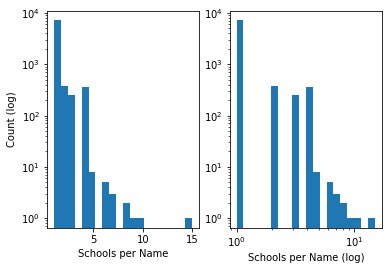

In [35]:
#Plot histogram of number of schools per Name
plt.subplot(1, 2, 1)
hist, bins, _ = plt.hist(data['INSTNM'].value_counts(), bins=20)
plt.xlabel('Schools per Name')
plt.ylabel('Count (log)')
plt.yscale('log')

plt.subplot(1, 2, 2)
# Converted to logarithmic scale
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(data['INSTNM'].value_counts(), bins=logbins)
plt.xlabel('Schools per Name (log)')
plt.xscale('log')
plt.yscale('log')
plt.show()

While there are many unique school names, there are also equally many schools names with counts of between 10 & 100.

Now that we have a sense of how often school names are repeated in the database, we can explore the distribution of the OPEID.

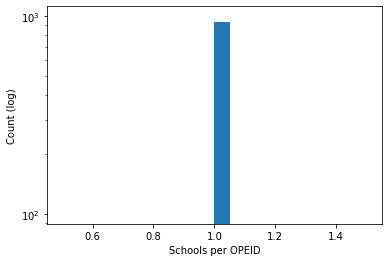

In [36]:
#Plot histogram of number of schools per OPEID
plt.hist(data['OPEID'].value_counts(), bins=20)
plt.xlabel('Schools per OPEID')
plt.ylabel('Count (log)')
plt.yscale('log')
#plt.savefig('figures/currentOPEIDHistogram.png',bbox_inches='tight')

Many of the currently operating schools are missing OPEID values, (which is not true of previous years), so there not multiple schools associated with the OPEIDs. However, the OPEID isn't included in the modeling, so its distribution isn't as crucial as other variables.

Previous exploration showed that ITT Technical Institute occured most often in the database. How many OPEIDs are associated with ITT Tech?

In [37]:
itt = data.loc[data['INSTNM'].str.startswith('itt tech')] # TECHNICAL INSTITUTE']
print(itt.OPEID.value_counts())

00844300    1
00732987    1
10732935    1
Name: OPEID, dtype: int64


## Explore categorical columns
### Primary degree type

What are the values and distribution of the 'Primary degree type' column? 

They have been processed as categorical data, but coded numerically - which is appropriate for the machine learning model, but not easily human-readable.

In [38]:
predom_degree = {'0':'Not classified', '1':'Certificate', '2':'Associates', '3':'Bachelor', '4':'Graduate'}
degree_order = ['Not classified', 'Certificate', 'Associates', 'Bachelor', 'Graduate']
data['PREDDEG_N'] = data['PREDDEG'].astype('str')

for i in range(len(data.PREDDEG_N)):
    val = data.loc[i, 'PREDDEG_N']
    cat = predom_degree[val]
    data.loc[i, 'PREDDEG_N'] = cat

pred_pie = data.PREDDEG_N.value_counts(sort=True)
print(pred_pie)
print('There are ', data.PREDDEG_N.isnull().sum(), 'null values.')

Certificate       4934
Bachelor          2342
Associates        1813
Not classified     726
Graduate           385
Name: PREDDEG_N, dtype: int64
There are  0 null values.


In [39]:
pred_pie_name = [i for i in pred_pie.index]

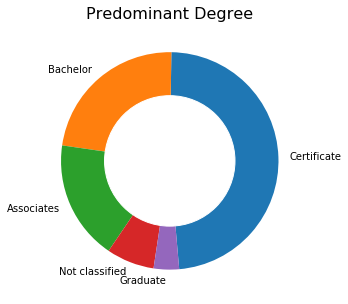

In [40]:
fig, ax = plt.subplots(figsize = (5, 5))
plt.pie(pred_pie, labels = pred_pie.index, startangle=-85)
plt.title('Predominant Degree', fontsize=16)

# add a circle at the center
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
ax.annotate
 
#plt.show()
plt.savefig('figures/currentDegreeDonut.png')

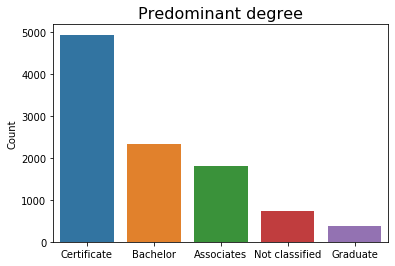

In [41]:
sns.barplot(x=pred_pie.index, y=pred_pie )
plt.ylabel('Count')
plt.title('Predominant degree', fontsize=16)
plt.savefig('figures/currentDegreeBar.png')

In [42]:
degree_currop = data.pivot_table(index='PREDDEG', columns='CURROPER', aggfunc='size')
print(degree_currop)

CURROPER  False  True 
PREDDEG               
0           253    473
1          1841   3093
2           325   1488
3           241   2101
4            99    286


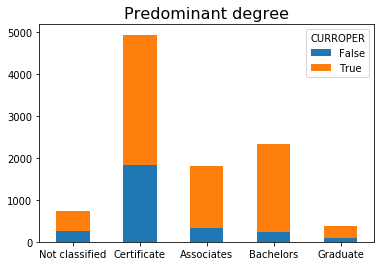

In [43]:
degree_currop.plot.bar(stacked=True, rot=0)
plt.xlabel('')
plt.xticks([0,1,2,3,4],['Not classified', 'Certificate', 'Associates', 'Bachelors', 'Graduate'])
plt.title('Predominant degree', fontsize=16)
plt.savefig('figures/currentDegreeStackBar.png')

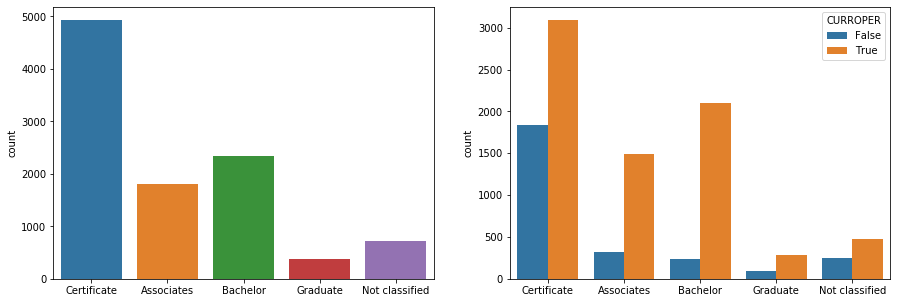

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data.PREDDEG_N, ax=axs[0])
axs[0].set_xlabel('')
sns.countplot('PREDDEG_N', data=data, hue='CURROPER', ax=axs[1])
axs[1].set_xlabel('')
plt.savefig('figures/currentPREDDEGBar.png')

### High degree awarded
What are the values and distributions in the 'High degree' column? Again, these should be categorical variables. How is the highest degree offered by an institution related to the primary degree type?

In [45]:
high_degree = {'0':'No degree', '1':'Certificate', '2':'Associates', '3':'Bachelor', '4':'Graduate'}
high_deg = data['HIGHDEG'].astype('str')

for i in range(len(high_deg)):
    val = high_deg[i]
    cat = high_degree[val]
    high_deg[i] = cat

high_deg.value_counts()

Certificate    3871
Graduate       2314
Associates     2235
Bachelor       1054
No degree       726
Name: HIGHDEG, dtype: int64

Interestingly, there are 726 non-degree-granting institutions, which is the same number as the "Not classifed" category in the 'Primary degree type' column.

The following pivot table and heat map shows how the primary degree type and the high degree type are related.

HIGHDEG      0       1       2      3       4
PREDDEG                                      
0        726.0     NaN     NaN    NaN     NaN
1          NaN  3871.0   936.0   81.0    46.0
2          NaN     NaN  1299.0  427.0    87.0
3          NaN     NaN     NaN  546.0  1796.0
4          NaN     NaN     NaN    NaN   385.0


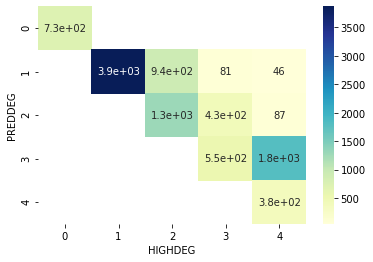

In [46]:
degree = data.pivot_table(index='PREDDEG', columns='HIGHDEG', aggfunc='size')

string = degree.iloc[:, :].astype('str')
string.replace({'0':np.nan, 0:np.nan}, inplace=True)
print(string)

sns.heatmap(string, cmap='YlGnBu', annot=True)
#plt.savefig('figures/currentPreddegHighDegHeatmap.png',bbox_inches='tight')

Indeed, the 726 'Non-degree granting institutions' from 'High degree" are the same as the 'Not classified' schools from 'Primary degree type'.

Not surprisingly, the highest degrees offered at each institution are at least as high as their primary degree - there is not a primarily bachelor's granting institution with the highest degree of a certificate. However, the highest degree offered by a school may be higher than it's predominant degree type. For each school type, there are several primarily certificate institutions that also award graduate degrees.

A vast majority of the certificate granting instutitions and associates granting institutions offer a certificate and associate's degree, respectively, as their highest degree. However, 73.7% of the bachelor's granting institutions offer graduate degrees as their highest degree.

Given some of the predictability in the patterning between these two columns, it seems likely that only one of these categories will need to be kept in the final analysis. My inclination is to keep the 'Primary degree type' column, and delete the 'High degree' column.

### Control - Public, Private nonprofit and Private-for-profit
What is the distribution of schools by "Control" type? There are three types coded in the data: Public, Private nonprofit and Private for-profit

In [47]:
control_type = {'1':'Public', '2':'Private nonprofit', '3':'Private for-profit', 'nan':np.nan}
control_order=['Public', 'Private nonprofit', 'Private for-profit']

data['Governance'] = data['CONTROL'].astype('str')

for i in range(len(data.Governance)):
    val = data.loc[i, 'Governance']
    cat = control_type[val]
    data.loc[i,'Governance'] = cat
    
print(data.Governance.value_counts())
print(data.Governance.value_counts()/data.shape[0])
print('There are ', data.Governance.isnull().sum(), 'null values.')

Private for-profit    5678
Private nonprofit     2270
Public                2252
Name: Governance, dtype: int64
Private for-profit    0.556667
Private nonprofit     0.222549
Public                0.220784
Name: Governance, dtype: float64
There are  0 null values.


There are approximately equal numbers of public and private non-profit schools. About 50% of the schools are private for-profit schools. It will be interesting to see how the control type interacts with the other variables like cost, size, and degree type.

In [48]:
control_pie = data.loc[data.CURROPER==True].Governance.value_counts()
control_pie_names = [i for i in control_pie.index]

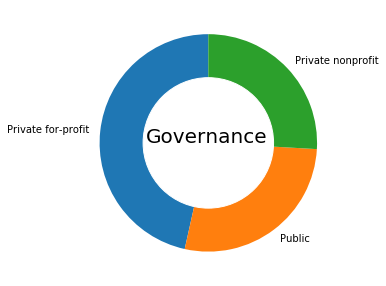

In [49]:
fig, ax = plt.subplots(figsize = (5, 5))
plt.pie(control_pie, labels = control_pie.index, startangle=90)

# add a circle at the center
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
ax.annotate('Governance', xy = (.27, .5), xycoords='axes fraction', fontsize=20)

plt.savefig('figures/currentGovDonut.png')

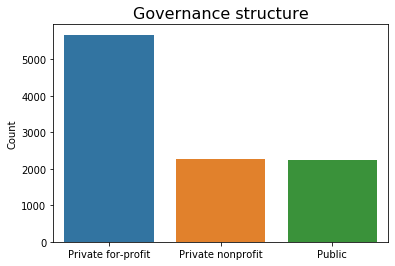

In [50]:
sns.countplot(data.Governance)
plt.ylabel('Count')
plt.xlabel('')
plt.title('Governance structure', fontsize=16)
plt.savefig('figures/currentGovBar.png')

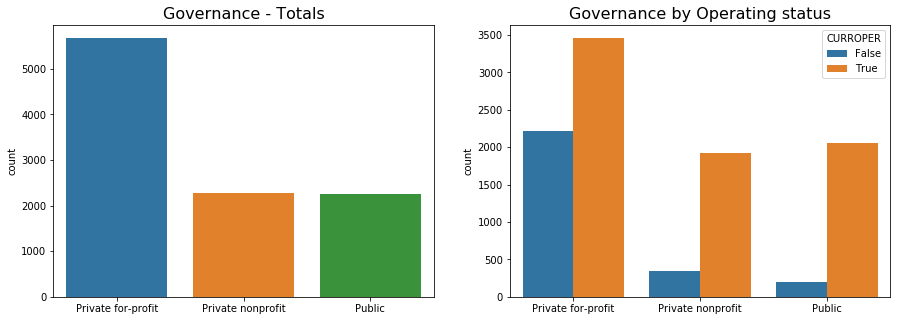

In [51]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data.Governance, ax=axs[0])
axs[0].set_title('Governance - Totals', fontsize=16)
axs[0].set_xlabel('')
sns.countplot('Governance', data=data, hue='CURROPER', ax=axs[1])
axs[1].set_xlabel('')
axs[1].set_title('Governance by Operating status', fontsize=16)
plt.savefig('figures/currentGovBars.png')

In [52]:
control_currop = data.pivot_table(index='CONTROL', columns='CURROPER', aggfunc='size')
print(control_currop)

CURROPER  False  True 
CONTROL               
1           200   2052
2           342   1928
3          2217   3461


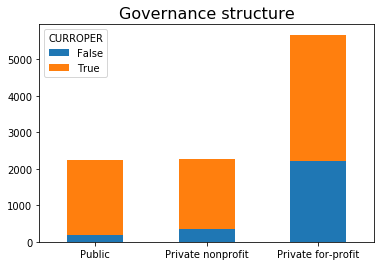

In [53]:
control_currop.plot.bar(stacked=True, rot=0)
plt.xticks([0, 1, 2], ['Public', 'Private nonprofit', 'Private for-profit'])
plt.xlabel('')
plt.title('Governance structure', fontsize=16)
plt.savefig('figures/currentGovStackBar.png')

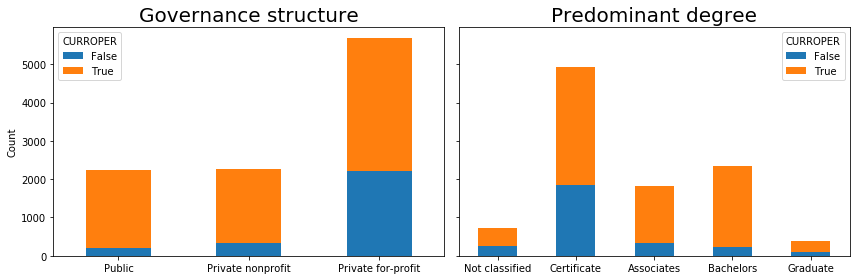

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
control_currop.plot.bar(stacked=True, rot=0, ax=axs[0])
axs[0].set_xticks([0, 1, 2])
axs[0].set_xticklabels(['Public', 'Private nonprofit', 'Private for-profit'])
axs[0].set_xlabel('')
axs[0].set_ylabel('Count')
axs[0].set_title('Governance structure', fontsize=20)
degree_currop.plot.bar(stacked=True, rot=0, ax=axs[1])
axs[1].set_xticks([0, 1, 2, 3, 4])
axs[1].set_xticklabels(['Not classified', 'Certificate', 'Associates', 'Bachelors', 'Graduate'])
axs[1].set_xlabel('')
axs[1].set_title('Predominant degree', fontsize=20)
plt.tight_layout()
plt.savefig('figures/currentGovDegStackBars.png')

Governance      Private for-profit  Private nonprofit  Public
PREDDEG_N                                                    
Associates                     802                189     822
Bachelor                       406               1335     601
Certificate                   3877                346     711
Graduate                        93                276      16
Not classified                 500                124     102


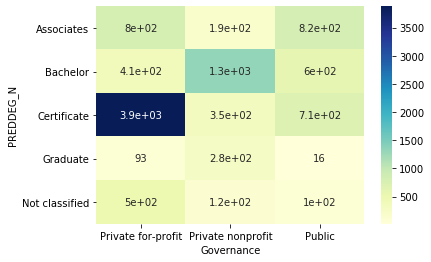

In [55]:
control_degree = data.pivot_table(index='PREDDEG_N', columns='Governance', aggfunc='size')
print(control_degree)
sns.heatmap(control_degree, cmap='YlGnBu', annot=True)
plt.savefig('figures/PreddegControlHeatmap.png',bbox_inches='tight')

In [56]:
control_degree2 = data.pivot_table(index='PREDDEG_N', columns=['Governance','CURROPER'], aggfunc='size')
print(control_degree2)

Governance     Private for-profit       Private nonprofit       Public      
CURROPER                    False True              False True   False True 
PREDDEG_N                                                                   
Associates                    257   545                26   163     42   780
Bachelor                      134   272                94  1241     13   588
Certificate                  1577  2300               147   199    117   594
Graduate                       58    35                40   236      1    15
Not classified                191   309                35    89     27    75


### Location - Region
How are the schools distributed by state and region?
While there is information available about the state of each school, the state and region would be highly correlated, since the region category is based on state.

In [57]:
region_dict = {"0.0": 'US Service Schools',
               "1.0": 'New England',  # CT, ME, MA, NH, RI, VT
               "2.0": 'Mid East',     # DE, DC, MD, NJ, NY, PA
               "3.0": 'Great Lakes',  # IL, IN, MI, OH, WI
               "4.0": 'Plains',       # IA, KS, MN, MO, NE, ND, SD
               "5.0": 'Southeast',    # AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV
               "6.0": 'Southwest',    # AZ, NM, OK, TX
               "7.0": 'Rocky Mountains', # CO, ID, MT, UT, WY
               "8.0": 'Far West',     # AK, CA, HI, NV, OR, WA
               "9.0": 'Outlying Areas' # AS, FM, GU, MH, MP, PR, PW, VI
}

data.region.value_counts()

5.0    2514
3.0    1577
2.0    1533
8.0    1466
6.0    1081
4.0     848
1.0     593
7.0     397
9.0     190
0.0       1
Name: region, dtype: int64

## Explore columns with numerical values

### Number of branches
All of the schools were labeled as main branches in the original dataset, however some schools are associated with multiple branches.

1      6081
2      1098
3       636
4       323
5       227
6       213
141     146
9       134
8       129
7       117
99      101
14      100
86       88
26       85
10       77
71       71
31       64
11       56
78       52
12       50
23       47
16       35
33       33
15       33
13       30
28       29
72       26
19       22
17       21
93       21
18       19
85       12
84       11
60        5
22        4
128       2
119       2
Name: NUMBRANCH, dtype: int64


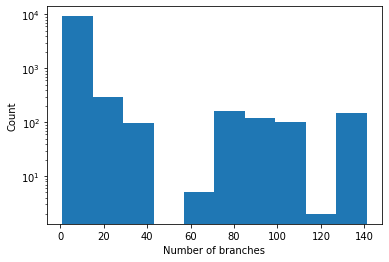

In [58]:
print(data['NUMBRANCH'].value_counts())
plt.hist(data['NUMBRANCH'])
plt.xlabel('Number of branches')
plt.ylabel('Count')
plt.yscale('log')
plt.savefig('figures/currentNumbranchHist.png',bbox_inches='tight')

Most schools (6081) have only a single branch, while a few have more than 100 branches. It will be interesting to see how the number of branches might relate to school name and OPEID, particularly for the schools with more than 100 branches.

### Enrollment
The 'Enrollment-DegreeSeeking' column contains the number undergraduate degree-seeking students enrolled at the institution.

In [59]:
print('Null count: ', data['UGDS'].isnull().sum(), " - " , round(data['UGDS'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['UGDS']==0]
print('Schools with 0 Enrollment', zero.shape[0])
data['UGDS'].describe().T

Null count:  926  -  9.0 %
Schools with 0 Enrollment 18


count      9274.000000
mean       1907.782726
std        4854.761452
min           0.000000
25%         107.000000
50%         335.000000
75%        1394.750000
max      166816.000000
Name: UGDS, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


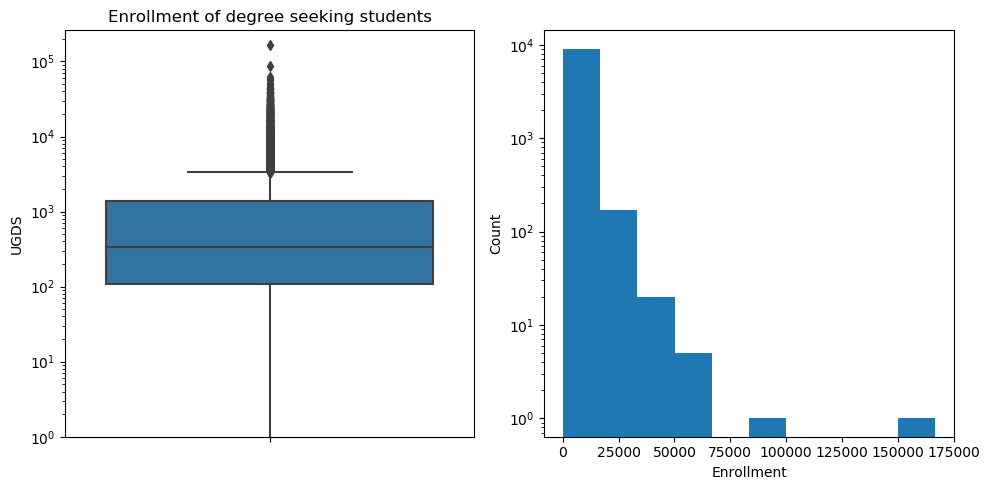

In [60]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('UGDS', data=data, orient='v')
plt.title('Enrollment of degree seeking students')
plt.yscale('log')
plt.ylim([1, 260000])

plt.subplot(1, 2, 2)
plt.hist(data['UGDS'])
plt.xlabel('Enrollment')
plt.ylabel('Count')
plt.yscale('log')
plt.tight_layout()
plt.show()

Given the wide range of enrollments and huge numbers of outliers, it might be helpful to convert enrollment into bins - small, medium, large, huge; or by number ranges

In [61]:
# Convert to bins - experiment with different values to see what works
bins=[0, 1, 150, 500, 2000, 260000]
labels = ['none', 'small', 'medium', 'large', 'xl']
data["EnrollmentBins"]=pd.cut(data['UGDS'], bins, labels = labels )
data["EnrollmentBins"].value_counts()

small     3013
medium    2337
large     2074
xl        1828
none         4
Name: EnrollmentBins, dtype: int64

### Net Price
This column contains the net price for both 4 year and less than 4 year institutions.

In [62]:
print('Null count: ', data['NetPrice'].isnull().sum(), " - " , round(data['NetPrice'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['NetPrice']==0]
print('Schools with 0 Net Price', zero.shape[0])
data['NetPrice'].describe().T

Null count:  2075  -  20.0 %
Schools with 0 Net Price 6


count     8125.000000
mean     15705.554954
std       7533.141561
min      -5029.000000
25%       9916.000000
50%      15492.000000
75%      20805.000000
max      87570.000000
Name: NetPrice, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


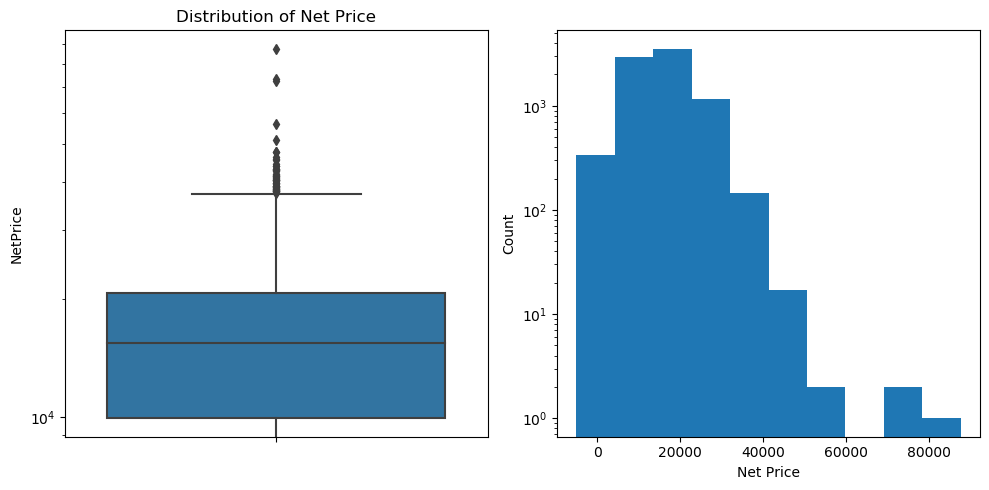

In [63]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('NetPrice', data=data, orient='v')
plt.title('Distribution of Net Price')
plt.yscale('log')

plt.subplot(1, 2, 2)
plt.hist(data['NetPrice'])
plt.xlabel('Net Price')
plt.ylabel('Count')
plt.yscale('log')
plt.tight_layout()
plt.show()

In [64]:
NegNetPrice = data.loc[data['NetPrice'] < 0 ]
print(NegNetPrice.shape)
print(NegNetPrice.NetPrice.describe())

(41, 33)
count      41.000000
mean    -2713.975610
std      1307.894806
min     -5029.000000
25%     -3514.000000
50%     -2798.000000
75%     -1749.000000
max      -264.000000
Name: NetPrice, dtype: float64


There are 41 schools with negative values for net price, ranging from -5029 to -264.
I'm not sure what the negative net price means.

### Cost
This column include the cost for all types of programs.

In [65]:
print('Null count: ', data['Cost'].isnull().sum(), " - " , round(data['Cost'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['Cost']==0]
print('Schools with 0 Cost', zero.shape[0])
data['Cost'].describe().T

Null count:  1539  -  15.0 %
Schools with 0 Cost 3


count     8661.000000
mean     22236.184390
std      10173.261637
min          0.000000
25%      14900.000000
50%      20796.000000
75%      26788.000000
max      89422.000000
Name: Cost, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


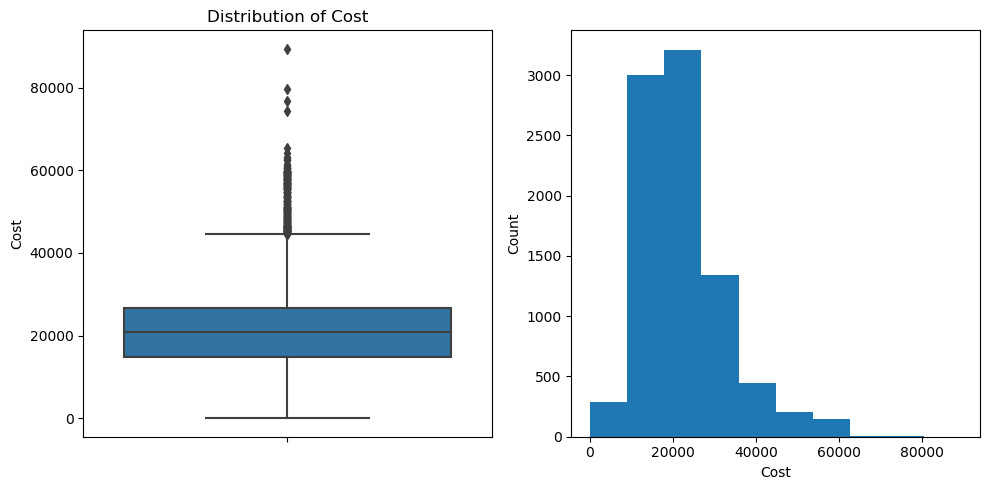

In [66]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('Cost', data=data, orient='v')
plt.title('Distribution of Cost')

plt.subplot(1, 2, 2)
plt.hist(data['Cost'])
plt.xlabel('Cost')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Tuition Revenue

The next column contains the Tuition Revenue per Full-Time equivalent student. According to the data dictionary, this is the net tuition revenue (tuition revenue minus discounts and allowances) divided by the number of FTE students (undergraduates and graduate students). Generally, a full time equivalence is 12 undergraduate credit hours or 6 graduate hours per semester.

In [67]:
print('Null count: ', data['TUITFTE'].isnull().sum()," - ", round(data['TUITFTE'].isnull().sum()/data.shape[0] *100), "%")

zero = data.loc[data['TUITFTE']==0]
print('Schools with 0 TuitionRevenue/FTE', zero.shape[0])

data['TUITFTE'].describe()

Null count:  585  -  6.0 %
Schools with 0 TuitionRevenue/FTE 35


count      9615.000000
mean       9783.645554
std        8192.678798
min           0.000000
25%        4568.500000
50%        8705.000000
75%       12942.000000
max      207213.000000
Name: TUITFTE, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


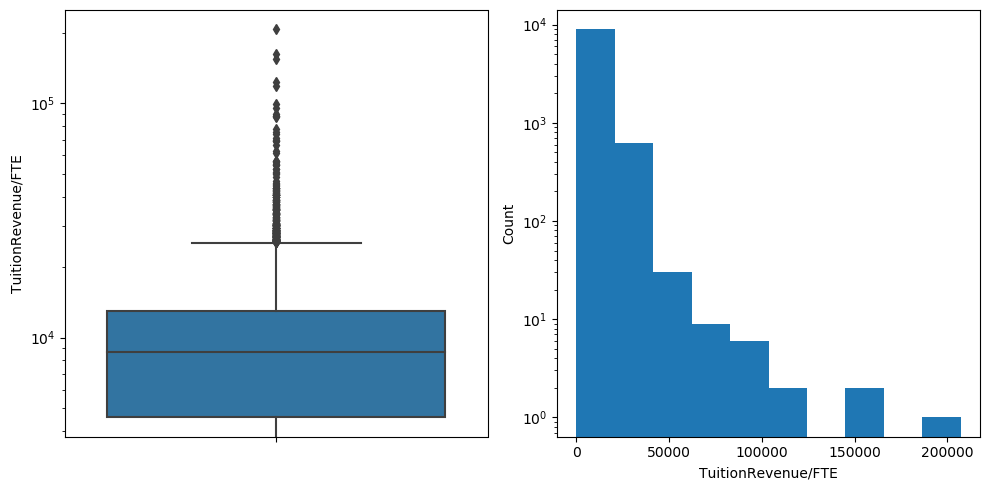

In [68]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('TUITFTE', data=data, orient = 'v')
plt.ylabel('TuitionRevenue/FTE')
plt.yscale('log')

plt.subplot(1, 2, 2)
plt.hist(data['TUITFTE'])
plt.xlabel('TuitionRevenue/FTE')
plt.ylabel('Count')
plt.yscale('log')
plt.tight_layout()
plt.show()

There are 35 schools that report 0 tuition revenue, though 585 schools have null values. It might be worth binning the Tuition Revenue column into ranges, or groups.

One school seems to have a much higher tuition revenue than the others. Which school is this, and what is their tuition rate?

In [69]:
high_tuition_school = data['TUITFTE'].max()
high_tuition = data.loc[data['TUITFTE']==high_tuition_school]

high_tuition.iloc[0]
high_tuition_name = high_tuition.iloc[0]['INSTNM']
high_tuition_amount = high_tuition.iloc[0]['TUITFTE']

print(high_tuition_name, high_tuition_amount)

mauna loa helicopters 207213.0


In [70]:
# Convert tuition to bins
bins = [0, 1, 2500, 6000, 10000, 30000000]
label = ['none', 'low', 'med', 'high', 'highest']
data['TuitionBins'] = pd.cut(data['TUITFTE'], bins=bins, labels = label)
data.TuitionBins.value_counts()

highest    3880
high       2560
med        1807
low        1333
none          0
Name: TuitionBins, dtype: int64

### Expenditure
Next, is the Expenditure/FTE column which contains "Instructional expenditures divided by the number of FTE students (undergraduates and graduate students) (http://nces.ed.gov/ipeds/glossary/index.asp?id=854)."

In [71]:
print('Null count: ', data['INEXPFTE'].isnull().sum()," - ", round(data['INEXPFTE'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['INEXPFTE']==0]
print('Schools with 0 Expenditure/FTE', zero.shape[0])

data['INEXPFTE'].describe()

Null count:  585  -  6.0 %
Schools with 0 Expenditure/FTE 15


count      9615.000000
mean       6559.140302
std        9171.044556
min           0.000000
25%        2915.500000
50%        4850.000000
75%        7378.000000
max      307089.000000
Name: INEXPFTE, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


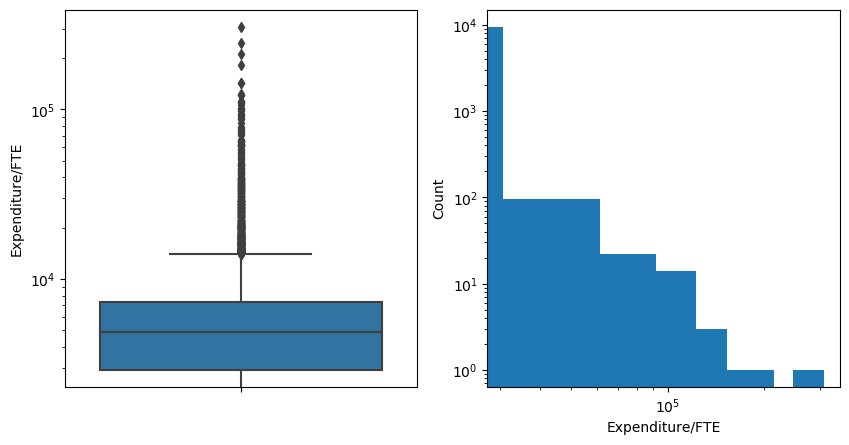

In [72]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('INEXPFTE', data=data, orient='v')
plt.ylabel('Expenditure/FTE')
plt.yscale('log')

plt.subplot(1, 2, 2)
plt.hist(data['INEXPFTE'])
plt.xlabel('Expenditure/FTE')
plt.ylabel('Count')
plt.xscale('log')
plt.yscale('log')
plt.show()

What is the school with the max value?

In [73]:
max_expend = data['INEXPFTE'].max()
max_expenditure_school = data.loc[data['INEXPFTE']== max_expend]

max_expenditure_school.iloc[0]
max_expend_name = max_expenditure_school.iloc[0]['INSTNM']
max_expend_amount = max_expenditure_school.iloc[0]['INEXPFTE']

print(max_expend_name, max_expend_amount)

university of texas southwestern medical center 307089.0


It will be interesting to see if Tuition Revenue and Expenditure correlate.

In [74]:
# Convert values to bins
data['ExpenditureBins'] = pd.cut(data['INEXPFTE'], bins=bins, labels = label)
data.ExpenditureBins.value_counts()

med        4172
high       2244
low        1871
highest    1313
none          0
Name: ExpenditureBins, dtype: int64

### Admission Rate

The Admission Rate is the "number of admitted undergraduates divided by the number of undergraduates who applied."

In [75]:
print('Null count: ', data['ADM_RATE'].isnull().sum() , " - " , round(data['ADM_RATE'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['ADM_RATE']==0]
print('Schools with 0 Admission Rate', zero.shape[0])

data['ADM_RATE'].describe()

Null count:  7709  -  76.0 %
Schools with 0 Admission Rate 7


count    2491.000000
mean        0.685507
std         0.213003
min         0.000000
25%         0.551400
50%         0.707800
75%         0.844750
max         1.000000
Name: ADM_RATE, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


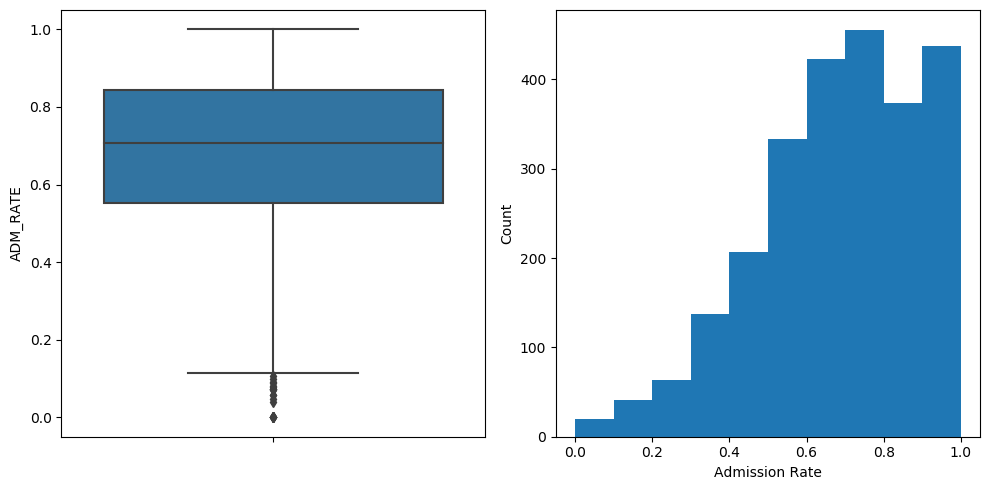

In [76]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('ADM_RATE', data=data, orient='v')

plt.subplot(1, 2, 2)
plt.hist(data['ADM_RATE'])
plt.xlabel('Admission Rate')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Average monthly faculty salary

The next column is Average Faculty Salary per month. According to the data dictionary, it is calculated from the "total salary outlays divided by the number of months worked for all full-time nonmedical instructional staff." 

In [77]:
print('Null count: ', data['AVGFACSAL'].isnull().sum(), " - " , round(data['AVGFACSAL'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['AVGFACSAL']==0]
print('Schools with 0 AvgFaculty Salary', zero.shape[0])

data['AVGFACSAL'].describe()

Null count:  4644  -  46.0 %
Schools with 0 AvgFaculty Salary 0


count     5556.000000
mean      5682.702664
std       2258.729791
min        269.000000
25%       4064.750000
50%       5430.000000
75%       6947.000000
max      23611.000000
Name: AVGFACSAL, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


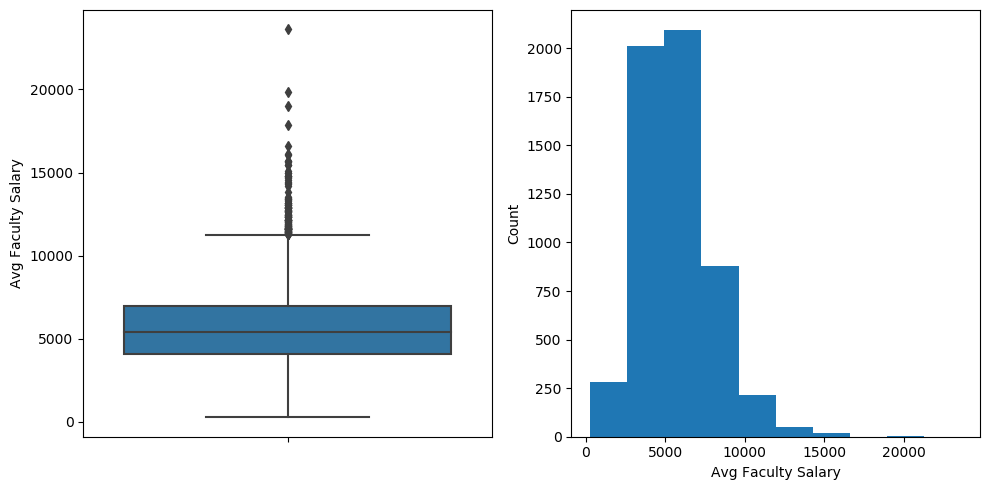

In [78]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('AVGFACSAL', data=data, orient='v')
plt.ylabel('Avg Faculty Salary')

plt.subplot(1, 2, 2)
plt.hist(data['AVGFACSAL'])
plt.xlabel('Avg Faculty Salary')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

What is the school with the highest salary? It seems to be quite a bit higher than the other schools.

In [79]:
max_sal = data['AVGFACSAL'].max()
max_sal_school = data.loc[data['AVGFACSAL']== max_sal]

max_sal_school.iloc[0]
max_sal_name = max_sal_school.iloc[0]['INSTNM']
max_sal_amount = max_sal_school.iloc[0]['AVGFACSAL']

print(max_sal_name, max_sal_amount)

the university of texas md anderson cancer center 23611.0


It will be interesting to see how faculty salary varies by school type, size, and tuition revenue.

### Percent fulltime faculty
The next column is the percentage of faculty that are fulltime faculty. The value should be between 0 and 1.

In [80]:
print('Null count: ', data['PFTFAC'].isnull().sum()," - " , round(data['PFTFAC'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['PFTFAC']==0]
print('Schools with 0 Percent Fulltime Faculty', zero.shape[0])

data['PFTFAC'].describe()

Null count:  5305  -  52.0 %
Schools with 0 Percent Fulltime Faculty 26


count    4895.000000
mean        0.545651
std         0.309996
min         0.000000
25%         0.278800
50%         0.502700
75%         0.840150
max         1.000000
Name: PFTFAC, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


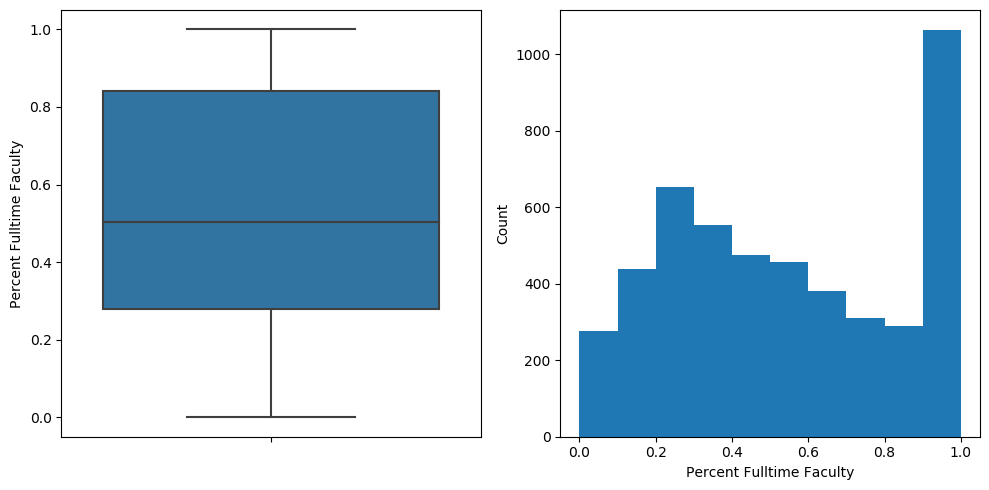

In [81]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('PFTFAC', data=data, orient='v')
plt.ylabel('Percent Fulltime Faculty')

plt.subplot(1, 2, 2)
plt.hist(data['PFTFAC'])
plt.xlabel('Percent Fulltime Faculty')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Proportion of students who complete a degree
The next columns show the proportion of undergraduate students who completed their degree within 150% of the normal time. There is one column for institutions that offer primarily certificate and associate's degree programs, which typically take less than 4 years to complete, and a separate column for 4-year institutions.

There are no rows that have values for both of these columns so I  am going to combine them into one "completion" column.

In [82]:
completion_rate = data[['C150_4', 'C150_L4']]
not_null = completion_rate.notnull()
eitherdf = completion_rate.loc[(not_null['C150_4'])|(not_null['C150_L4'])]

data['Complete'] = data['C150_4'].combine(data['C150_L4'], take_full)
data = data.drop(['C150_4', 'C150_L4'], axis=1)

print('Null count: ', data.Complete.isnull().sum()," - " , round(data['Complete'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['Complete']==0]
print('Schools with 0 Completion rate', zero.shape[1])

data.Complete.describe()

Null count:  2015  -  20.0 %
Schools with 0 Completion rate 34


count    8185.000000
mean        0.535789
std         0.243497
min         0.000000
25%         0.346900
50%         0.560400
75%         0.719400
max         1.000000
Name: Complete, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


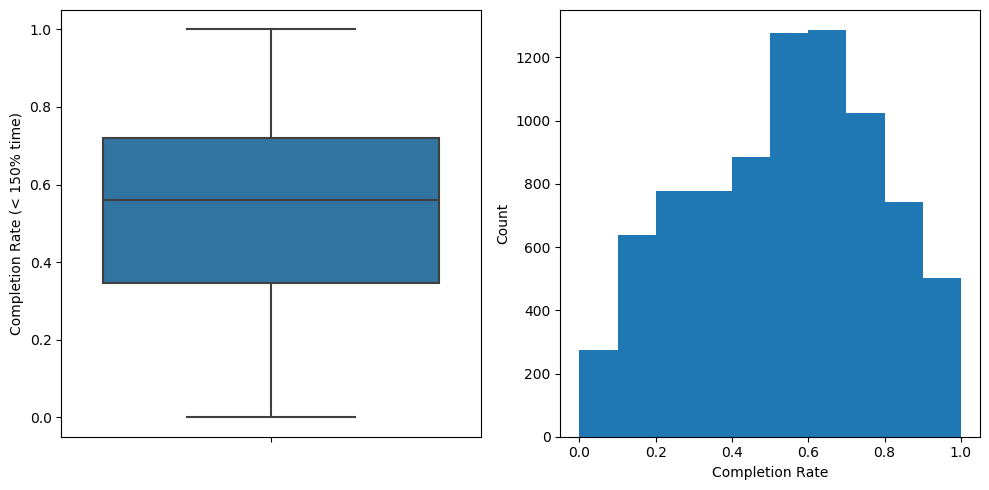

In [83]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('Complete', data=data, orient = 'v')
plt.ylabel('Completion Rate (< 150% time)')

plt.subplot(1, 2, 2)
plt.hist(data['Complete'])
plt.xlabel('Completion Rate')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Retention Rates
According to the data documentation, "retention rate identifies (separately) the share of full-time and part-time students in the prior year, at four-year (RET_FT4 and RET_PT4) and less-than-four- year institutions (RET_FTL4 and RET_PTL4), who return to the institution after the first year. For four-year institutions, the retention rate covers bachelor’s degree-seeking students only; at less-than-four-year institutions, it covers all degree/certificate-seeking students."

In [84]:
retention = data[['RET_FT4','RET_FTL4','RET_PT4','RET_PTL4']]
not_null = retention.notnull()
fulltimedf = retention.loc[(not_null['RET_FT4'])|(not_null['RET_FTL4'])]

print(fulltimedf.head())

partimedf = retention.loc[(not_null['RET_PT4'])|(not_null['RET_PTL4'])]
print(partimedf.tail())

   RET_FT4  RET_FTL4  RET_PT4  RET_PTL4
0   0.4333       NaN      0.0       NaN
1      NaN    0.6087      NaN    0.2500
2      NaN    0.5000      NaN    0.7619
4      NaN    0.5875      NaN       NaN
5      NaN    0.8772      NaN       NaN
      RET_FT4  RET_FTL4  RET_PT4  RET_PTL4
9774      NaN    0.4649      NaN    0.5679
9775      NaN    0.8519      NaN    0.8462
9776      NaN    0.8929      NaN    0.8750
9777   0.7158       NaN   0.6343       NaN
9778      NaN    0.4314      NaN    0.2609


In [85]:
# Combine Retention columns
data['RetentionFT'] = data['RET_FT4'].combine(data['RET_FTL4'], take_full)
data['RetentionPT'] = data['RET_PT4'].combine(data['RET_PTL4'], take_full)
data = data.drop(['RET_FT4','RET_FTL4','RET_PT4','RET_PTL4'], axis=1)

print('Null count: ', data.RetentionFT.isnull().sum(), " - " , round(data['RetentionFT'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['RetentionFT']==0]
print('Schools with 0 Completion rate - Full Time:', zero.shape[0])

print('Null count: ', data.RetentionPT.isnull().sum(), " - " , round(data['RetentionPT'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['RetentionPT']==0]
print('Schools with 0 Completion rate - Part Time:', zero.shape[0])
#print(zero.head())

data[['RetentionFT', 'RetentionPT']].describe()

Null count:  2048  -  20.0 %
Schools with 0 Completion rate - Full Time: 96
Null count:  5593  -  55.0 %
Schools with 0 Completion rate - Part Time: 362


RetentionFT  RetentionPT
count  8152.000000  4607.000000
mean      0.680332     0.525446
std       0.190025     0.281930
min       0.000000     0.000000
25%       0.571400     0.340800
50%       0.697500     0.500000
75%       0.812500     0.742400
max       1.000000     1.000000

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


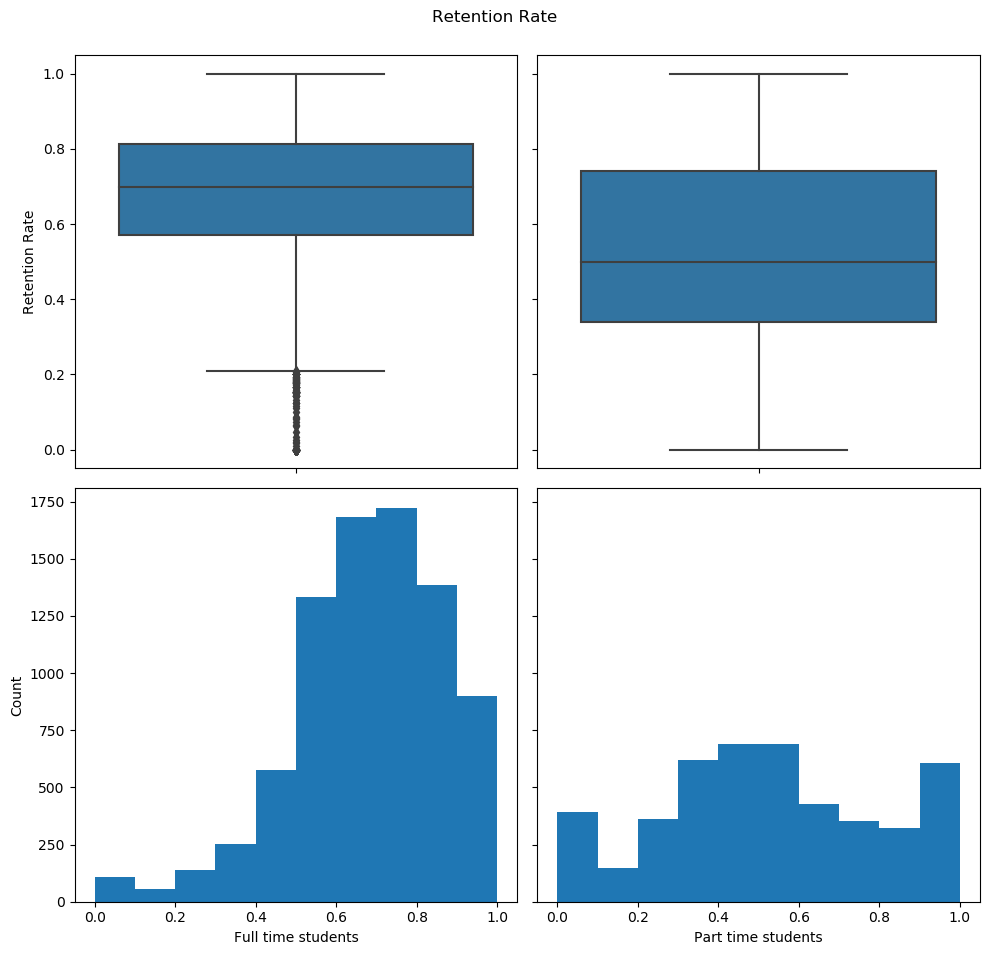

In [86]:
fig, axs=plt.subplots(2, 2, sharey='row', figsize=(10,10), dpi= 100, facecolor='w', edgecolor='k')

sns.boxplot('RetentionFT', data=data, orient = 'v', ax=axs[0,0])
axs[0,0].set_ylabel('Retention Rate')

sns.boxplot('RetentionPT', data=data, orient = 'v', ax=axs[0,1])
axs[0,1].set_ylabel('')

axs[1,0].hist(data['RetentionFT'])
axs[1,0].set_xlabel('Full time students')
axs[1,0].set_ylabel('Count')

axs[1,1].hist(data['RetentionPT'])
axs[1,1].set_xlabel('Part time students')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

fig.suptitle('Retention Rate')
plt.show()

### Percent Completed, Withdrawn and Still Enrolled at the original institution after 4 years

In [87]:
print('Null count, completed: ', data['COMP_ORIG_YR4_RT'].isnull().sum(), " - " , round(data['COMP_ORIG_YR4_RT'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['COMP_ORIG_YR4_RT']==0]
print('Schools with 0 PercentCompleted4yr', zero.shape[0])

print('Null count, withdrawn: ', data['WDRAW_ORIG_YR4_RT'].isnull().sum(), " - " , round(data['WDRAW_ORIG_YR4_RT'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['WDRAW_ORIG_YR4_RT']==0]
print('Schools with 0 PercentWithdraw4yr', zero.shape[0])

print('Null count, enrolled: ', data['ENRL_ORIG_YR4_RT'].isnull().sum(), " - " , round(data['ENRL_ORIG_YR4_RT'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['ENRL_ORIG_YR4_RT']==0]
print('Schools with 0 PercentEnrolled4yr', zero.shape[0])

data[['COMP_ORIG_YR4_RT', 'WDRAW_ORIG_YR4_RT', 'ENRL_ORIG_YR4_RT']].describe()

Null count, completed:  8258  -  81.0 %
Schools with 0 PercentCompleted4yr 77
Null count, withdrawn:  8321  -  82.0 %
Schools with 0 PercentWithdraw4yr 200
Null count, enrolled:  8691  -  85.0 %
Schools with 0 PercentEnrolled4yr 1096


COMP_ORIG_YR4_RT  WDRAW_ORIG_YR4_RT  ENRL_ORIG_YR4_RT
count       1942.000000        1879.000000       1509.000000
mean           0.464344           0.231804          0.012351
std            0.213178           0.127853          0.028095
min            0.000000           0.000000          0.000000
25%            0.305780           0.162935          0.000000
50%            0.510699           0.225413          0.000000
75%            0.631568           0.311241          0.006656
max            1.000000           0.550914          0.307692

### Median debt amount

In [88]:
print('Null count: ', data['DEBT_MDN'].isnull().sum()," - " , round(data['DEBT_MDN'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['DEBT_MDN']==0]
print('Schools with 0 Median debt:', zero.shape[0])

data['DEBT_MDN'].describe()

Null count:  1530  -  15.0 %
Schools with 0 Median debt: 0


count      8670.000000
mean      11419.601845
std        5327.623330
min         333.000000
25%        7917.000000
50%        9500.000000
75%       14656.500000
max      131335.000000
Name: DEBT_MDN, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


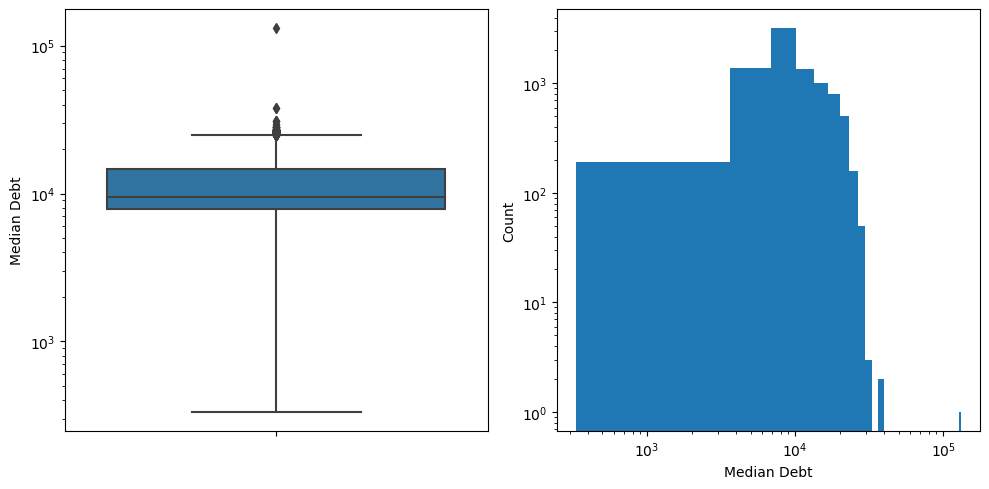

In [89]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('DEBT_MDN', data=data, orient='v')
plt.ylabel('Median Debt')
plt.yscale('log')

plt.subplot(1, 2, 2)
plt.hist(data['DEBT_MDN'], bins=40)
plt.xlabel('Median Debt')
plt.ylabel('Count')
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()

One schools seems to have a much higher median debt than the others. What is this schoool?

In [90]:
max_debt = data['DEBT_MDN'].max()
max_debt_school = data.loc[data['DEBT_MDN']== max_debt]

max_debt_school.iloc[0]
max_debt_name = max_debt_school.iloc[0]['INSTNM']
max_debt_amount = max_debt_school.iloc[0]['DEBT_MDN']

print(max_debt_name, max_debt_amount)

aoma graduate school of integrative medicine 131335.0


### Students above 25 years of age

In [91]:
print('Null count: ', data['UG25abv'].isnull().sum()," - " , round(data['UG25abv'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['UG25abv']==0]
print('Schools with 0 Students > 25:', zero.shape[0])

data['UG25abv'].describe()

Null count:  2457  -  24.0 %
Schools with 0 Students > 25: 0


count    7743.000000
mean        0.431308
std         0.226830
min         0.000500
25%         0.268000
50%         0.428600
75%         0.591350
max         1.000000
Name: UG25abv, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


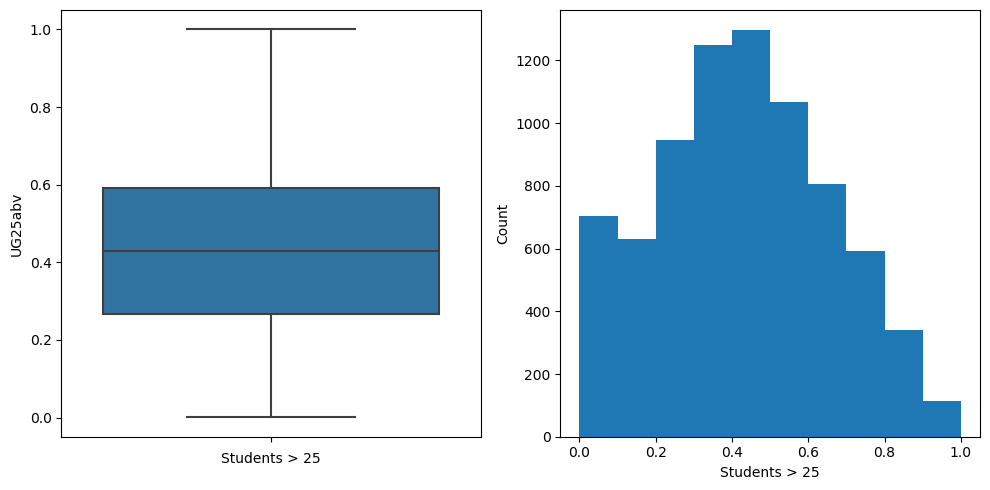

In [92]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('UG25abv', data=data, orient='v')
plt.xlabel('Students > 25')

plt.subplot(1, 2, 2)
plt.hist(data['UG25abv'])
plt.xlabel('Students > 25')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

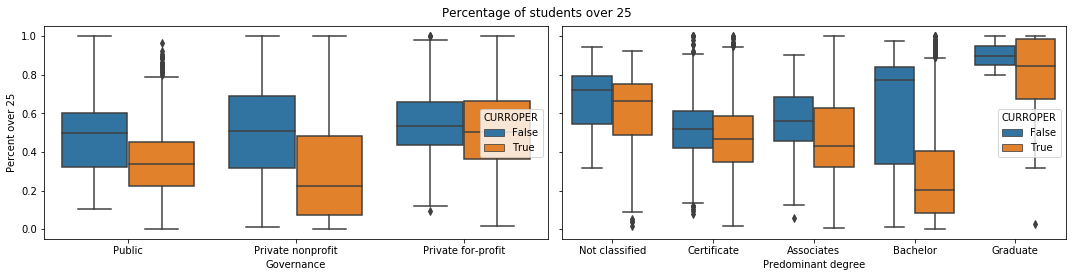

In [93]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4), sharey=True)
sns.boxplot('Governance','UG25abv', hue='CURROPER', data=data, ax=axs[0], order=control_order)
axs[0].set_xlabel('Governance')
axs[0].set_ylabel('Percent over 25')

sns.boxplot('PREDDEG_N','UG25abv', data=data, hue='CURROPER', ax=axs[1], order=degree_order)
axs[1].set_xlabel('Predominant degree')
axs[1].set_ylabel('')
axs[1].title

fig.suptitle('Percentage of students over 25')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('figures/currentOver25Boxes.png',bbox_inches='tight')

### Percent of students who took out a federal loan.

The column reports the "proportion of undergraduates who received a federal loan in the academic year...", expressed as a decimal, so the values should be between 0 and 1.

In [94]:
print('Null count: ', data['PCTFLOAN'].isnull().sum()," - " , round(data['PCTFLOAN'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['PCTFLOAN']==0]
print('Schools with 0 Federal Loan:', zero.shape[0])

data['PCTFLOAN'].describe()

Null count:  986  -  10.0 %
Schools with 0 Federal Loan: 875


count    9214.000000
mean        0.555778
std         0.288094
min         0.000000
25%         0.381550
50%         0.623700
75%         0.779175
max         1.000000
Name: PCTFLOAN, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


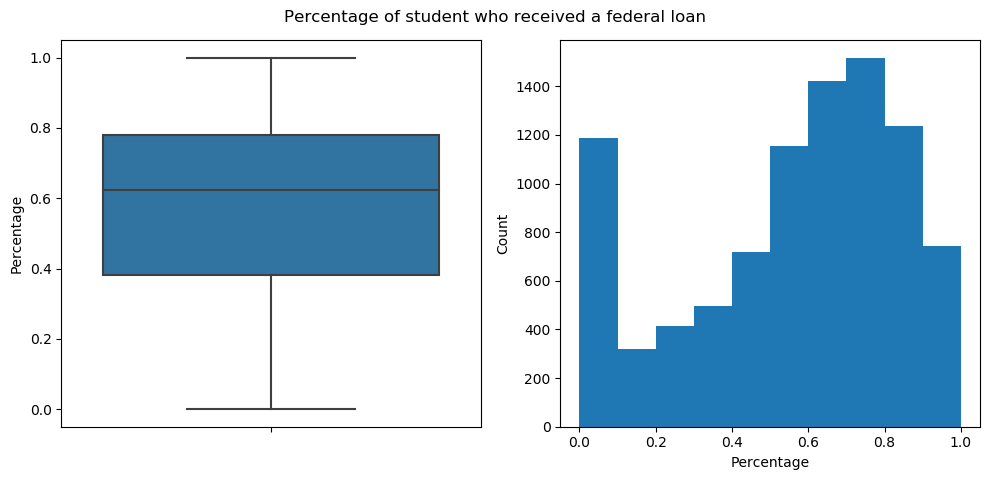

In [95]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('PCTFLOAN', data=data, orient='v')
plt.ylabel('Percentage')

plt.subplot(1, 2, 2)
plt.hist(data['PCTFLOAN'])
plt.xlabel('Percentage')
plt.ylabel('Count')

fig.suptitle('Percentage of student who received a federal loan')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

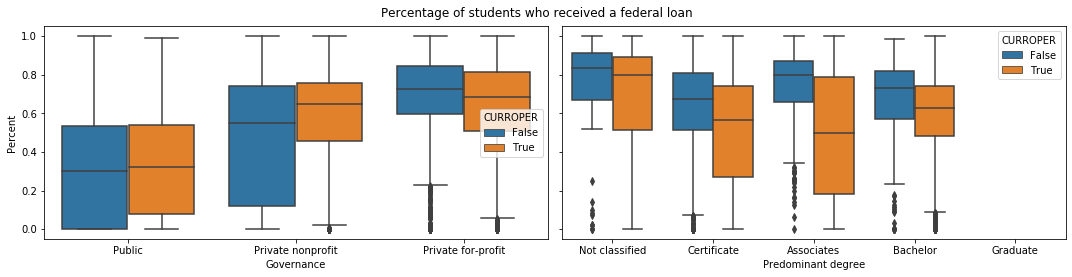

In [96]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4), sharey=True)
sns.boxplot('Governance','PCTFLOAN', hue='CURROPER', data=data, ax=axs[0], order=control_order)
axs[0].set_xlabel('Governance')
axs[0].set_ylabel('Percent')

sns.boxplot('PREDDEG_N','PCTFLOAN', data=data, hue='CURROPER', ax=axs[1], order=degree_order)
axs[1].set_xlabel('Predominant degree')
axs[1].set_ylabel('')
axs[1].title

fig.suptitle('Percentage of students who received a federal loan')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#plt.savefig('figures/currentFedLoanBoxes.png',bbox_inches='tight')

##  Explore the CURROPER column
- How many schools are open vs closed?
- What percentage of schools are open vs closed?
- How does this relate to control?

In [97]:
# How many schools are closed?
num_open = data['CURROPER'].sum()
print('Open:  ', num_open)

closed = data.loc[data['CURROPER']==False]
print('Closed:  ', closed.shape[0])

Open:   7441
Closed:   2759


In [98]:
#How many schools are closed by OPEID?
closed.OPEID.value_counts()

03649300    1
03901300    1
03726300    1
03210310    1
03651300    1
           ..
00304300    1
01072769    1
01309400    1
04151100    1
00450702    1
Name: OPEID, Length: 932, dtype: int64

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

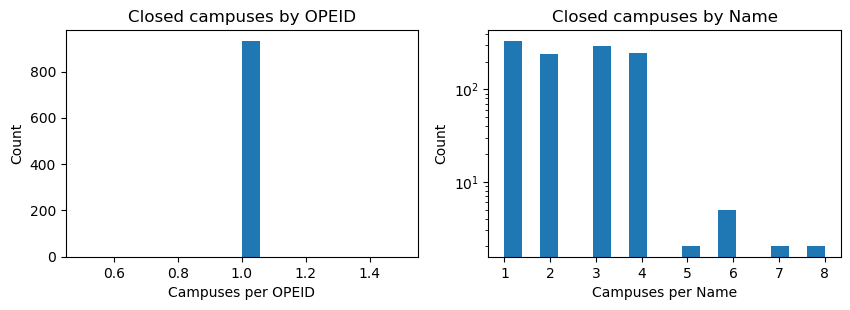

In [99]:
fig=plt.figure(figsize=(10,3), dpi= 100, facecolor='w', edgecolor='k')

plt.subplot(1, 2, 1)
plt.hist(closed.OPEID.value_counts(), bins=18)
plt.xlabel('Campuses per OPEID')
plt.ylabel('Count')
plt.title('Closed campuses by OPEID')

plt.subplot(1, 2, 2)
plt.hist(closed.INSTNM.value_counts(), bins=18)
plt.yscale('log')
plt.xlabel('Campuses per Name')
plt.ylabel('Count')
plt.title('Closed campuses by Name')

plt.tight_layout
#plt.savefig('figures/currentClosedOPEIDNameHist.png',bbox_inches='tight')

In [100]:
closed.INSTNM.value_counts()

international beauty school               8
daymar college-louisville                 8
everest college-arlington                 7
central florida institute                 7
ati career training center-dallas         6
                                         ..
century college                           1
pivot point beauty school-bloomingdale    1
ivy tech community college-bloomington    1
johnson & wales university-online         1
world a cuts barber institute             1
Name: INSTNM, Length: 1132, dtype: int64

In [101]:
print(closed.Governance.value_counts())
print('There are ', closed.Governance.isnull().sum(), 'null values.')

Private for-profit    2217
Private nonprofit      342
Public                 200
Name: Governance, dtype: int64
There are  0 null values.


In [102]:
closed.PREDDEG_N.value_counts()

Certificate       1841
Associates         325
Not classified     253
Bachelor           241
Graduate            99
Name: PREDDEG_N, dtype: int64

In [103]:
closedControl = closed.pivot_table(index='PREDDEG_N', columns='Governance', aggfunc='size')
print(closedControl)

#print(control_type)

Governance      Private for-profit  Private nonprofit  Public
PREDDEG_N                                                    
Associates                     257                 26      42
Bachelor                       134                 94      13
Certificate                   1577                147     117
Graduate                        58                 40       1
Not classified                 191                 35      27


Text(33.0, 0.5, 'Predominant degree')

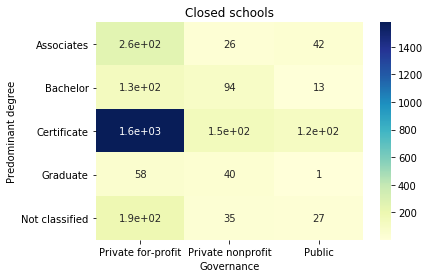

In [104]:
sns.heatmap(closedControl, cmap='YlGnBu' , annot=True)
plt.title('Closed schools')
plt.ylabel('Predominant degree')
#plt.savefig('figures/ClosedPreddegControlHeatmap.png',bbox_inches='tight')

The largest group of closed schools (1577) are private, for-profit, primarily certificate-granting institutions. The next largest category (257) are private, for-profit associates-granting institutions.

### Currently operating schools

In [105]:
operating = data.loc[data['CURROPER']==True]

openControl = operating.pivot_table(index='PREDDEG_N', columns='Governance', aggfunc='size')
print(openControl)

Governance      Private for-profit  Private nonprofit  Public
PREDDEG_N                                                    
Associates                     545                163     780
Bachelor                       272               1241     588
Certificate                   2300                199     594
Graduate                        35                236      15
Not classified                 309                 89      75


Text(33.0, 0.5, 'Predominant degree')

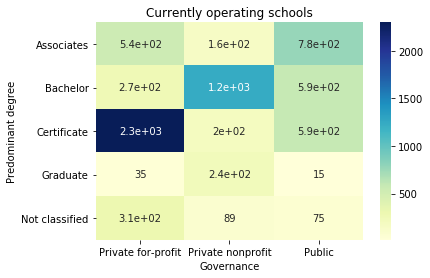

In [106]:
sns.heatmap(openControl, cmap='YlGnBu' , annot=True)
plt.title('Currently operating schools')
plt.ylabel('Predominant degree')
#plt.savefig('figures/OpenPreddegControlHeatmap.png',bbox_inches='tight')

The largest group of currently operating schools are for-profit certificate granting instutions - which mirrors the findings for the closed schools.

## Bivariate exploration
### College enrollment
How does college enrollment correlate with school type, tuition revenue, expenditure, and operating status?

In [107]:
subset = data.groupby(by=['Governance', 'CURROPER']).agg(['count','min', 'max', 'median', 'mean'])
subset.UGDS

count  min       max  median         mean
Governance         CURROPER                                           
Private for-profit False      2055  0.0   18063.0   182.0   417.618005
                   True       3179  0.0  166816.0   177.0   522.575024
Private nonprofit  False       273  0.0   10038.0   117.0   318.761905
                   True       1621  0.0   47079.0   987.0  1706.170882
Public             False       173  0.0   10801.0   526.0  1789.670520
                   True       1973  0.0   87017.0  3252.0  6087.667511

In [108]:
smallprofit = data.loc[(data.UGDS < 200) & (data.CONTROL ==3)]
smallprofit.shape

(2784, 32)

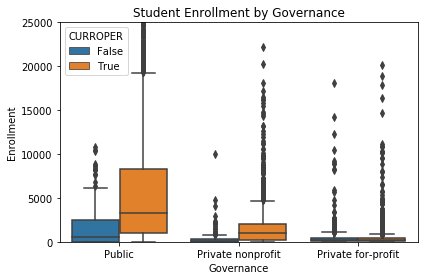

In [109]:
sns.boxplot('Governance', 'UGDS', data=data, hue = 'CURROPER', order=control_order)
plt.title('Student Enrollment by Governance')
plt.ylim((0,25000))
plt.xlabel('Governance')
plt.ylabel('Enrollment')
plt.tight_layout()

plt.savefig('figures/currentUGDSControlBox.png',bbox_inches='tight')

In [110]:
high_enrollment = data.loc[data['UGDS']>100000]
print(high_enrollment.CONTROL.value_counts())
#data.drop(high_enrollment.index, inplace=True)

3    1
2    0
1    0
Name: CONTROL, dtype: int64


The schools with the highest enrollment, in fact, the 4 schools with more than 100,000 students, are all private for-profit schools. However, over half of the private for=profit schools have less than 200 students.

Zooming in on the plot to include just schools with less than 10,000 students gives a more detailed view of the bulk of the data.

Private for-profit schools can have much higher enrollments than the other two types of schools. Interestingly, some of the closed for-profit schools have really high enrollments.

Currently operating public schools have the highest median enrollment.

Given the high number of values outside the IQR range for all three school types it seems like binning the values for enrollment would make sense.

In [111]:
EnrollmentBin = data.pivot_table(index='EnrollmentBins', columns='CONTROL', aggfunc='size')
EnrollmentBin

CONTROL            1    2     3
EnrollmentBins                 
none               1    2     1
small            263  438  2312
medium           163  378  1796
large            442  641   991
xl              1275  426   127

### Enrollment vs Tuition Revenue

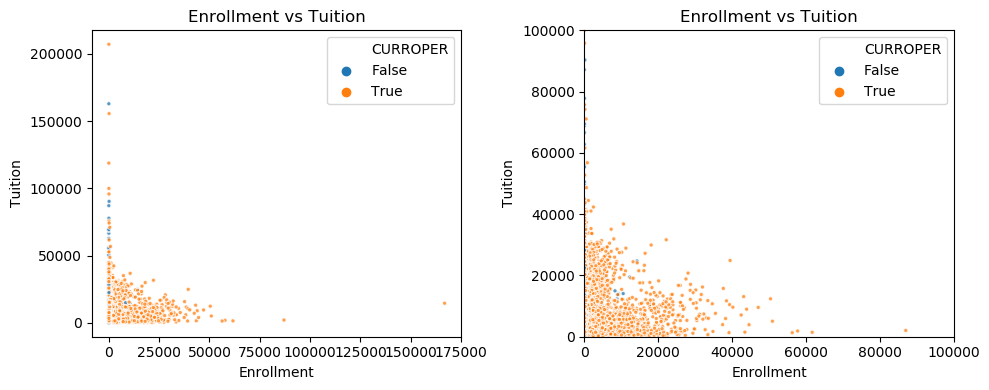

In [112]:
fig=plt.figure(figsize=(10,4), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('UGDS', 'TUITFTE', data=data, hue='CURROPER', marker='.', alpha=0.75)
plt.xlabel('Enrollment')
plt.ylabel('Tuition')
plt.title('Enrollment vs Tuition')

plt.subplot(1, 2, 2)
sns.scatterplot('UGDS', 'TUITFTE', data=data, hue='CURROPER', marker='.', alpha=0.75)
plt.xlabel('Enrollment')
plt.ylabel('Tuition')
plt.xlim(0, 100000)
plt.ylim(0, 100000)
plt.title('Enrollment vs Tuition')
plt.tight_layout()
#plt.show()

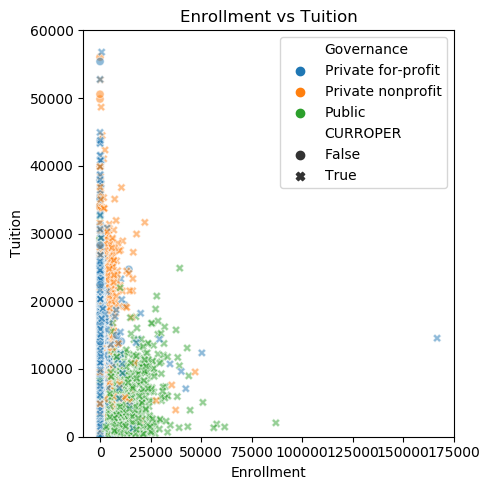

In [113]:
fig=plt.figure(figsize=(5,5), dpi= 100, facecolor='w', edgecolor='k')

sns.scatterplot('UGDS', 'TUITFTE', data=data, hue='Governance', style='CURROPER', alpha=0.5)
plt.xlabel('Enrollment')
plt.ylabel('Tuition')
plt.ylim(0, 60000)
plt.title('Enrollment vs Tuition')
plt.tight_layout()
#plt.savefig('figures/currentEnrollmentTuitionControl.png',bbox_inches='tight')

(0, 100000)

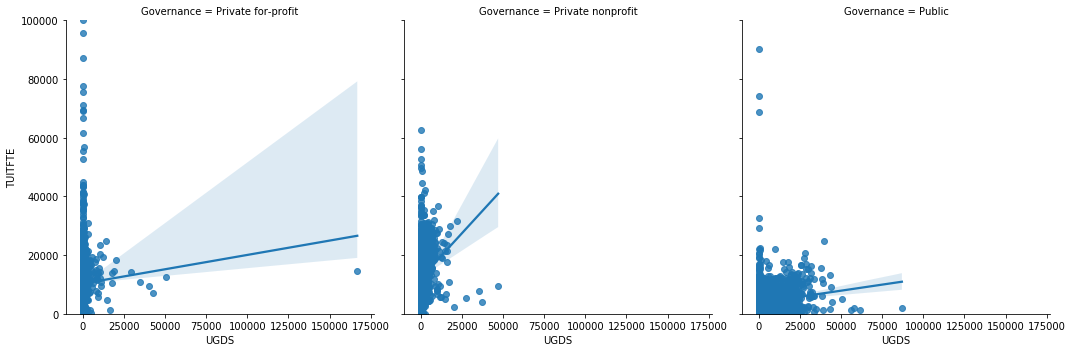

In [114]:
sns.lmplot( x='UGDS', y='TUITFTE', data=data , col='Governance')
plt.ylim(0, 100000)

It appears that the schools with the highest enrollment AND lowest tuition are mostly public schools, and the schools with lowest enrollment and highest tuition are private nonprofit schools, with several private for-profit schools mixed in.

Text(0.5, 1.0, 'Enrollment (binned) vs Tuition Revenue')

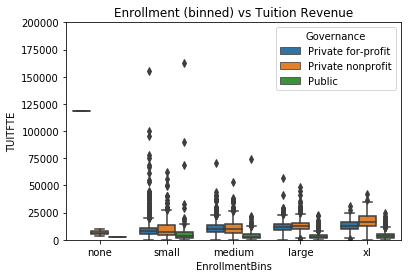

In [115]:
# Try to plot the Enrollment bins
sns.boxplot('EnrollmentBins', 'TUITFTE', hue='Governance', data=data)
plt.ylim(0, 200000)
plt.title('Enrollment (binned) vs Tuition Revenue')

### Enrollment vs Expenditure

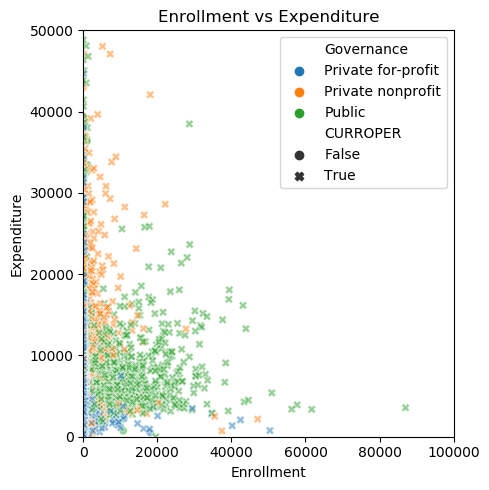

In [116]:
fig=plt.figure(figsize=(5,5), dpi= 100, facecolor='w', edgecolor='k')

sns.scatterplot('UGDS', 'INEXPFTE', data=data, hue='Governance', style='CURROPER', alpha=0.5)
plt.xlabel('Enrollment')
plt.ylabel('Expenditure')
plt.xlim(0, 100000)
plt.ylim(0, 50000)
plt.title('Enrollment vs Expenditure')
plt.tight_layout()
#plt.savefig('figures/currentEnrollmentExpenditureControl.png',bbox_inches='tight')

(0, 100000)

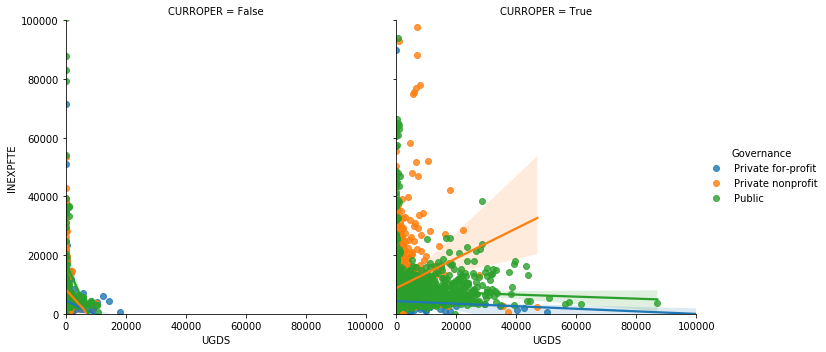

In [117]:
sns.lmplot( x='UGDS', y='INEXPFTE', data=data , hue='Governance', col='CURROPER')
plt.xlim(0, 100000)
plt.ylim(0, 100000)

Private for-profit schools generally have the lowest expenditure, regardless of enrollment, while private nonprofit schools have gnerally higher expenditures and lower enrollments. Levels of expenditure and school control type are explored more below.

### Tuition and Expenditure
How does tuition revenue correlate with expenditure, school type and operating status?

In [118]:
data['TUITFTE'].groupby(data['CONTROL']).mean()

CONTROL
1     4395.646026
2    13513.072946
3    10461.354399
Name: TUITFTE, dtype: float64

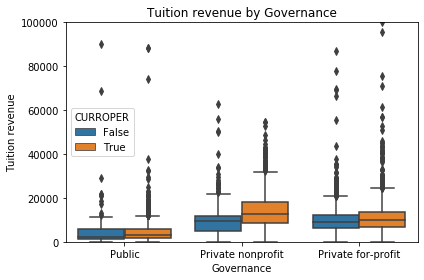

In [119]:
sns.boxplot('Governance', 'TUITFTE', data=data, hue = 'CURROPER', order=control_order)
plt.title('Tuition revenue by Governance')
plt.ylim(0, 100000)
plt.ylabel('Tuition revenue')
plt.xlabel('Governance')

plt.tight_layout()
#plt.savefig('figures/currentTuitonControlBox.png',bbox_inches='tight')

Public schools have the lowest mean tuition revenue, while private for profit schools have the highest mean tuition revenue, and private non-profit schools have the highest median tuition revenue.

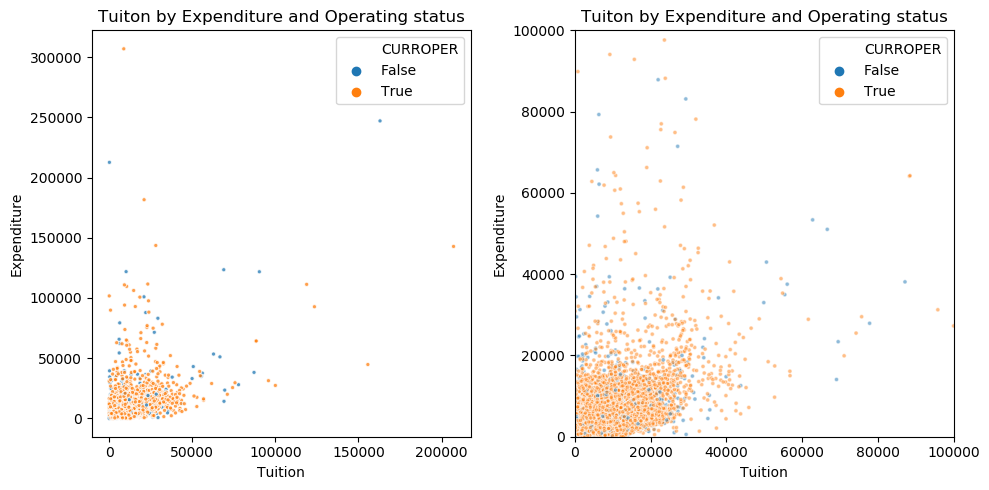

In [120]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('TUITFTE', 'INEXPFTE', data=data, hue='CURROPER', marker='.', alpha=0.75)
plt.xlabel('Tuition')
plt.ylabel('Expenditure')
plt.title('Tuiton by Expenditure and Operating status')

plt.subplot(1, 2, 2)
sns.scatterplot('TUITFTE', 'INEXPFTE', data=data, hue='CURROPER', marker='.', alpha=0.5)
plt.xlabel('Tuition')
plt.ylabel('Expenditure')
plt.xlim(0, 100000)
plt.ylim(0, 100000)
plt.title('Tuiton by Expenditure and Operating status')
plt.tight_layout()
#plt.show()

I thought that perhaps tuition and expenditure would correlate - especially for the schools with the highest tuition and the highest expenditure. While there may be a correlation between tuition and expenditure in general, the schools with the highest expenditure are not the schools with the highest tuition, and vice versa.

Text(0.5, 1.0, 'Tuiton by Expenditure and School Type')

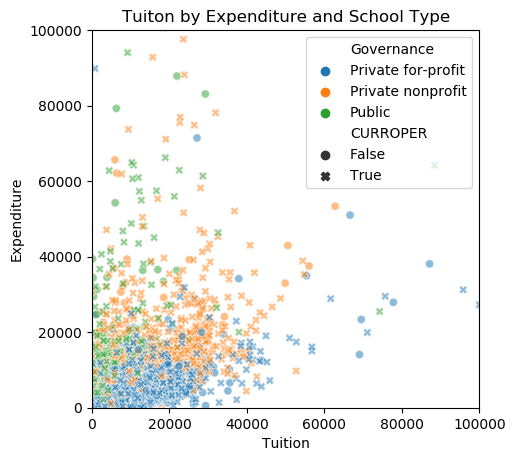

In [121]:
fig=plt.figure(figsize=(5,5), dpi= 100, facecolor='w', edgecolor='k')

sns.scatterplot('TUITFTE', 'INEXPFTE', data=data, hue='Governance', style='CURROPER', alpha=0.5)
plt.xlabel('Tuition')
plt.ylabel('Expenditure')
plt.xlim(0, 100000)
plt.ylim(0, 100000)
plt.title('Tuiton by Expenditure and School Type')
#plt.savefig('figures/currentTuitionExpenditureControl.png',bbox_inches='tight')

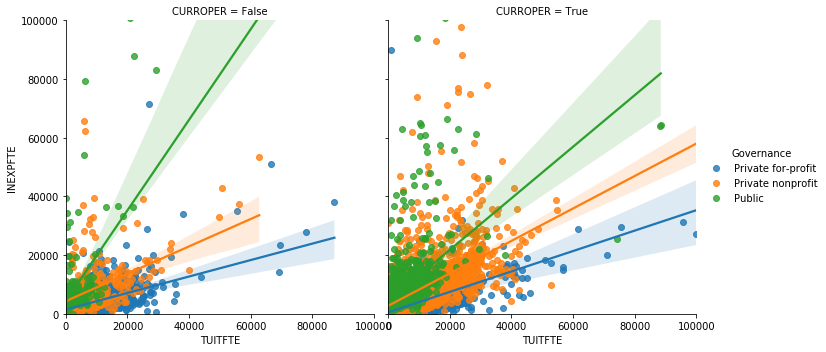

In [122]:
sns.lmplot( x='TUITFTE', y='INEXPFTE', data=data , hue='Governance', col='CURROPER')
plt.xlim(0, 100000)
plt.ylim(0, 100000)
plt.show()

In [123]:
data['INEXPFTE'].groupby(data['CONTROL']).mean()

CONTROL
1     8395.438540
2    10292.694829
3     4277.091391
Name: INEXPFTE, dtype: float64

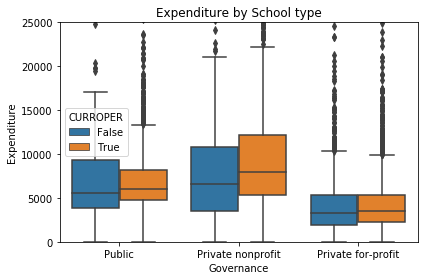

In [124]:
sns.boxplot('Governance', 'INEXPFTE', data=data, hue = 'CURROPER', order=control_order)
plt.title('Expenditure by School type')
plt.ylabel('Expenditure')
plt.xlabel('Governance')
plt.ylim((0,25000))
plt.tight_layout()

Private nonprofit schools have the highest median expenditure, while private for-profit schools have the lowest median expenditure levels. While public schools have medium levels of median instructional expenditure, the schools with the highest levels of expenditure (not shown) are also public schools.

## Net Price and Cost

In [125]:
# Enrollment vs Net Price
# How does enrollment relate to Net Price?
#How does Net Price correlate with expenditure, school type and operating status?
print(data['NetPrice'].groupby(data['CONTROL']).agg(['mean', 'min', 'median', 'max']))
print(data['Cost'].groupby(data['CONTROL']).agg(['mean', 'min', 'median', 'max']))

                 mean     min   median      max
CONTROL                                        
1         9526.236275 -1749.0   8773.5  27199.0
2        19577.933698 -4979.0  19576.0  45774.0
3        17110.558208 -5029.0  17394.0  87570.0
                 mean     min   median      max
CONTROL                                        
1        14559.230024  2729.0  13481.0  33208.0
2        32568.212907  6177.0  32000.0  64233.0
3        21977.457675     0.0  22090.0  89422.0


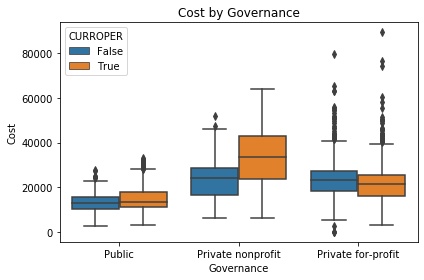

In [126]:
sns.boxplot('Governance', 'Cost', data=data, hue = 'CURROPER', order=control_order)
plt.title('Cost by Governance')
plt.ylabel('Cost')
plt.xlabel('Governance')
plt.tight_layout()
#plt.show()
plt.savefig('figures/currentCostGovBox.png',bbox_inches='tight')

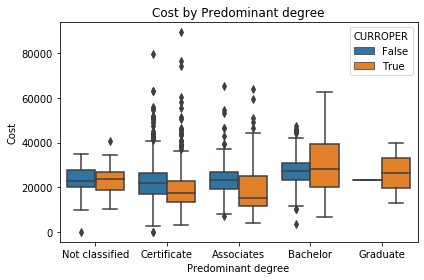

In [127]:
sns.boxplot('PREDDEG_N', 'Cost', data=data, hue = 'CURROPER', order=degree_order)
plt.title('Cost by Predominant degree')
plt.ylabel('Cost')
plt.xlabel('Predominant degree')
plt.tight_layout()
#plt.show()
plt.savefig('figures/currentCostDegreeBox.png',bbox_inches='tight')

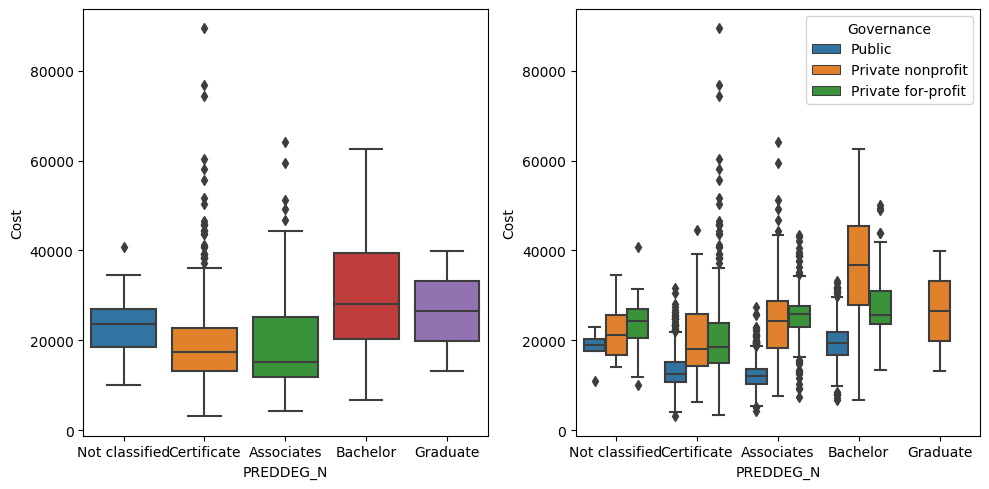

In [128]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('PREDDEG_N', 'Cost', data=data.loc[data.CURROPER ==True], order=degree_order) #, hue = 'Governance')
plt.subplot(1, 2, 2)
sns.boxplot('PREDDEG_N', 'Cost', data=data.loc[data.CURROPER ==True], hue = 'Governance',order=degree_order)
plt.tight_layout()

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Count')

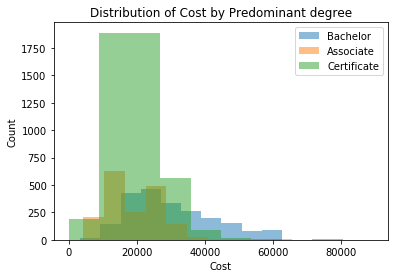

In [129]:
plt.hist(data.loc[data.PREDDEG==3, 'Cost'], alpha=0.5, label='Bachelor')
plt.hist(data.loc[data.PREDDEG==2, 'Cost'], alpha=0.5, label='Associate')
plt.hist(data.loc[data.PREDDEG==1, 'Cost'], alpha=0.5, label='Certificate')
plt.legend()
plt.title('Distribution of Cost by Predominant degree')
plt.xlabel('Cost')
plt.ylabel('Count')

In [130]:
grad = data.loc[(data.PREDDEG==4) & (data.CURROPER ==True)]
grad.Cost.describe()

count        2.000000
mean     26508.000000
std      18961.775444
min      13100.000000
25%      19804.000000
50%      26508.000000
75%      33212.000000
max      39916.000000
Name: Cost, dtype: float64

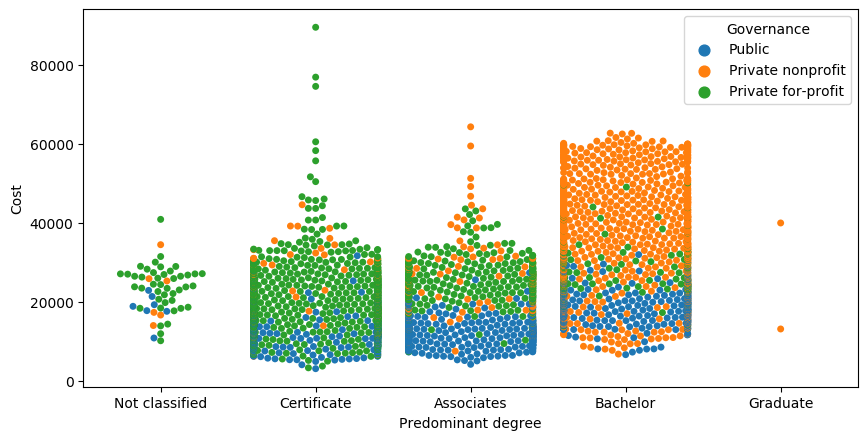

In [131]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
sns.swarmplot('PREDDEG_N', 'Cost', data=data.loc[data.CURROPER==True], hue = 'Governance', 
              order=['Not classified','Certificate','Associates', 'Bachelor', 'Graduate'])
plt.xlabel('Predominant degree')
plt.savefig('figures/currentPriceDegreeSwarm.png',bbox_inches='tight')

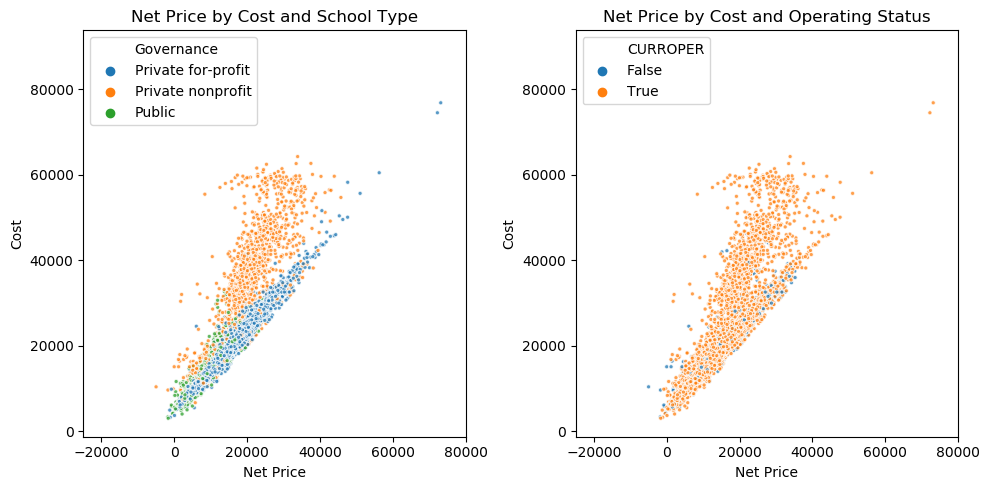

In [132]:
# Net Price vs Cost
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('NetPrice', 'Cost', data=data, hue='Governance', marker='.', alpha=0.75)
plt.xlabel('Net Price')
plt.ylabel('Cost')
plt.xlim([-25000, 80000])
plt.title('Net Price by Cost and School Type')

plt.subplot(1, 2, 2)
sns.scatterplot('NetPrice', 'Cost', data=data, hue='CURROPER', marker='.', alpha=0.75)
plt.xlabel('Net Price')
plt.ylabel('Cost')
plt.xlim([-25000, 80000])
plt.title('Net Price by Cost and Operating Status')

plt.tight_layout()
#plt.show()
#plt.savefig('figures/currentNetPriceCostControl.png',bbox_inches='tight')

Text(0.5, 1.0, 'Enrollment by Cost and School Type')

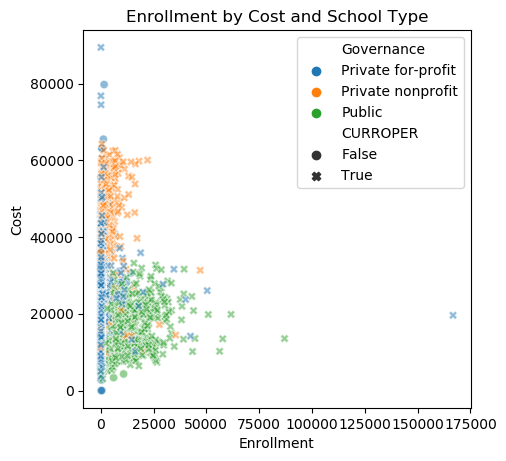

In [133]:
# Enrollment vs Net Price and Cost
fig=plt.figure(figsize=(5, 5), dpi= 100, facecolor='w', edgecolor='k')

sns.scatterplot('UGDS', 'Cost', data=data, hue='Governance', alpha=0.5, style='CURROPER')
plt.xlabel('Enrollment')
plt.ylabel('Cost')
plt.title('Enrollment by Cost and School Type')

#plt.savefig('figures/currentEnrollmentPriceControl.png',bbox_inches='tight')

Text(0.5, 1.0, 'Tuition Revenue by Cost and School Type')

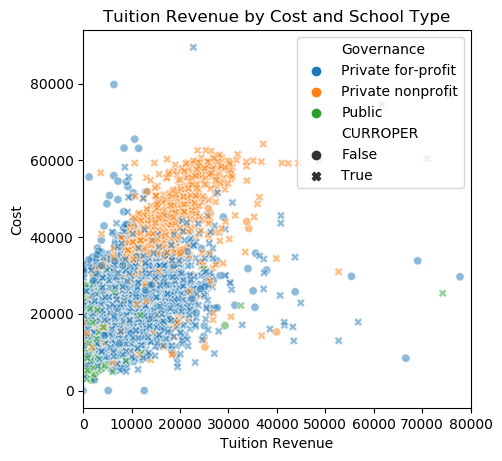

In [134]:
# Tuition vs Net Price
fig=plt.figure(figsize=(5,5), dpi= 100, facecolor='w', edgecolor='k')

sns.scatterplot('TUITFTE', 'Cost', data=data, hue='Governance', style='CURROPER', alpha=0.5)
plt.xlabel('Tuition Revenue')
plt.ylabel('Cost')
plt.xlim([0, 80000])
plt.title('Tuition Revenue by Cost and School Type')

#plt.savefig('figures/currentTuitionPrice.png',bbox_inches='tight')

Text(0.5, 1.0, 'Instructional Expenditure by Cost and School Type')

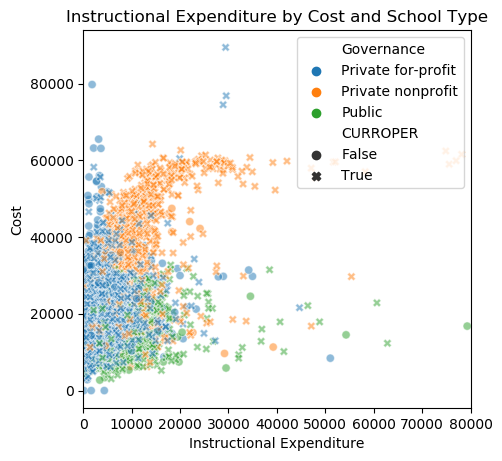

In [135]:
# Expenditure vs Net Price and Cost
fig=plt.figure(figsize=(5,5), dpi= 100, facecolor='w', edgecolor='k')

sns.scatterplot('INEXPFTE', 'Cost', data=data, hue='Governance', style='CURROPER', alpha=0.5)
plt.xlabel('Instructional Expenditure')
plt.ylabel('Cost')
plt.xlim([0, 80000])
plt.title('Instructional Expenditure by Cost and School Type')

#plt.savefig('figures/currentExpenditureCostControl.png',bbox_inches='tight')

<Figure size 1000x1000 with 0 Axes>

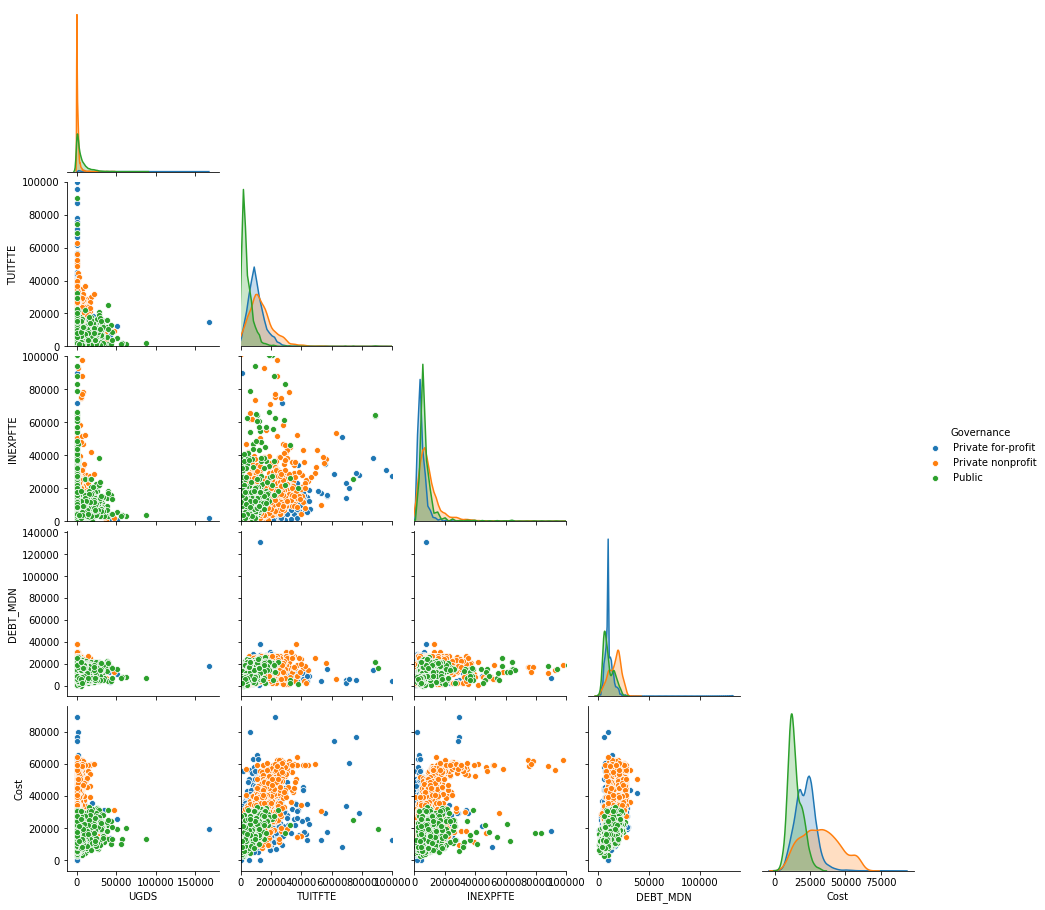

In [136]:
finances = data[['UGDS','TUITFTE', 'INEXPFTE','DEBT_MDN','Cost','Governance']]

fig=plt.figure(figsize=(10,10), dpi= 100, facecolor='w', edgecolor='k')
f = sns.pairplot(finances, hue = 'Governance', corner=True)#,  style='CURROPER')#alpha=0.5,
f.axes[1,0].set_ylim((0,100000))
f.axes[2,0].set_ylim((0,100000))
f.axes[4,1].set_xlim((0,100000))
f.axes[4,2].set_xlim((0,100000))
plt.show()
#plt.savefig('figures/currentFinancesPairPlot.png',bbox_inches='tight')

Text(0.5, 0.98, 'Cost by Median debt, Tuition revenue and Instructional expenditure')

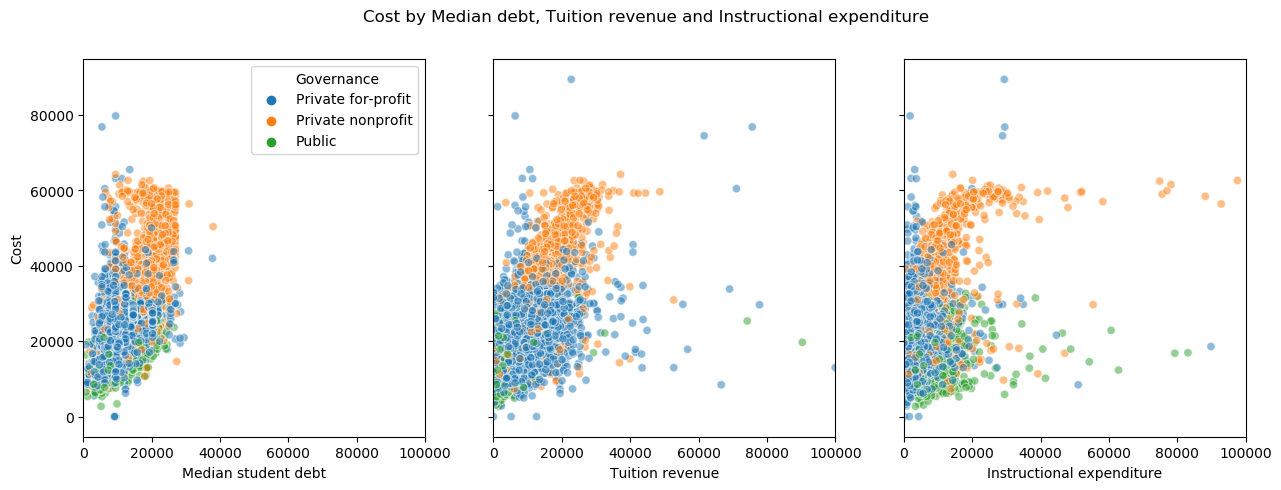

In [137]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15,5), dpi= 100, facecolor='w', edgecolor='k')

sns.scatterplot('DEBT_MDN', 'Cost', data=data, hue='Governance',  alpha=0.5, ax=axs[0])
plt.xlim(0,100000)
axs[0].set_xlabel('Median student debt')

sns.scatterplot('TUITFTE', 'Cost', data=data, hue='Governance',  alpha=0.5, legend=False, ax=axs[1])
axs[1].set_xlabel('Tuition revenue')

sns.scatterplot('INEXPFTE', 'Cost', data=data, hue='Governance',  alpha=0.5, ax=axs[2], legend=False)
axs[2].set_xlabel('Instructional expenditure')
fig.suptitle('Cost by Median debt, Tuition revenue and Instructional expenditure')
#plt.savefig('figures/currentFinancesCostPlots.png',bbox_inches='tight')

In [138]:
corr_df = data[['UGDS', 'Cost', 'DEBT_MDN', 'TUITFTE', 'INEXPFTE', 'AVGFACSAL','CONTROL']]
corr_df.columns = ['Enrollment', 'Cost', 'Debt', 'Tuition Rev.', 'Inst. Expend.', 'Fac. Salary', 'CONTROL']

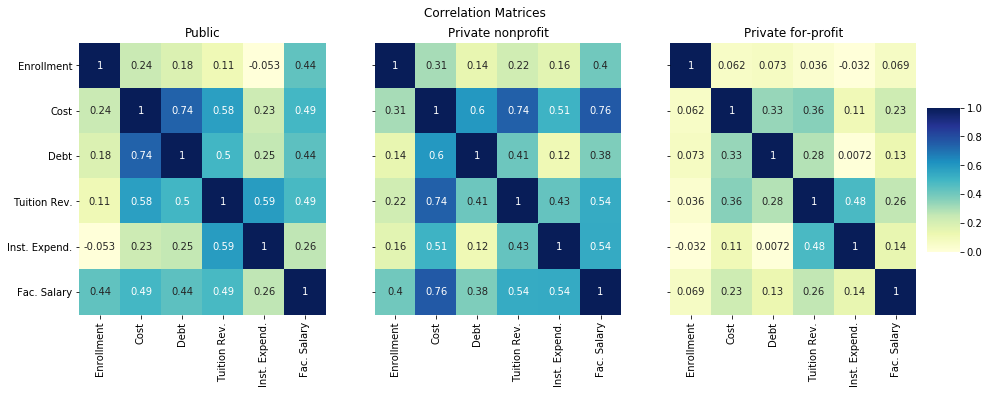

In [139]:
control_dict={1:'Public', 2:'Private nonprofit', 3:'Private for-profit'}
fig, axn = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15, 5))
cbar_ax = fig.add_axes([.91, .3, .03, .4])

for i, ax in enumerate(axn.flat):
    corr_mat = corr_df.loc[corr_df.CONTROL == i+1].corr()
    sns.heatmap(corr_mat, ax=ax, cbar= i==0, cmap='YlGnBu', annot=True,
               vmin=0, vmax=1, cbar_ax=None if i else cbar_ax)
    ax.set_title(control_dict[i+1])
    
fig.suptitle('Correlation Matrices')
plt.savefig('figures/currentFinanceCorrelationHeatmap.png',bbox_inches='tight')

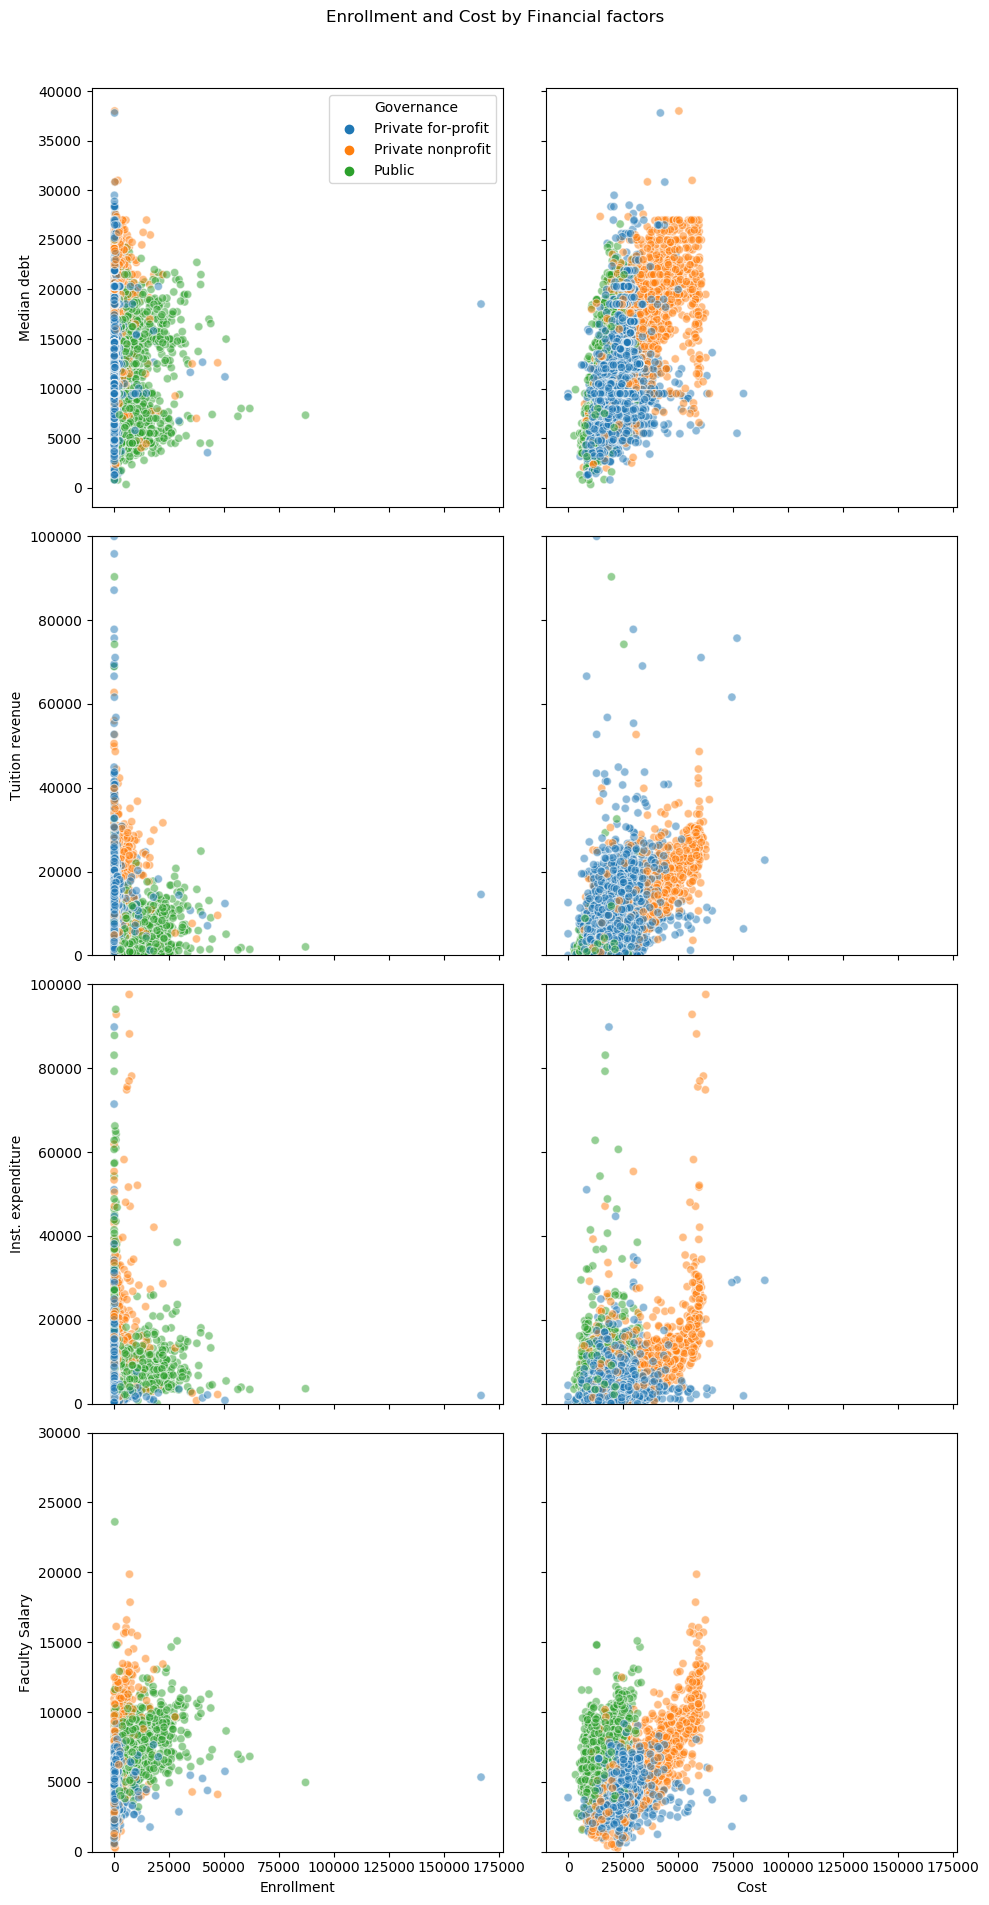

In [140]:
fig, axs = plt.subplots(nrows=4, ncols=2, sharex=True, sharey='row', figsize=(10,20), dpi= 100, facecolor='w', edgecolor='k')

sns.scatterplot('UGDS','DEBT_MDN', data=data, hue='Governance',  alpha=0.5, ax=axs[0,0])
plt.ylim(0,100000)
axs[0,0].set_ylabel('Median debt')

sns.scatterplot('Cost','DEBT_MDN', data=data, hue='Governance',  alpha=0.5, ax=axs[0,1], legend=False)

sns.scatterplot( 'UGDS','TUITFTE', data=data, hue='Governance',  alpha=0.5, legend=False, ax=axs[1,0])
axs[1,0].set_ylabel('Tuition revenue')
axs[1,0].set_ylim(0,100000)

sns.scatterplot('Cost','TUITFTE', data=data, hue='Governance',  alpha=0.5, legend=False, ax=axs[1,1])

sns.scatterplot( 'UGDS', 'INEXPFTE',data=data, hue='Governance',  alpha=0.5, ax=axs[2,0], legend=False)
axs[2,0].set_ylabel('Inst. expenditure')
axs[2,0].set_ylim(0,100000)

sns.scatterplot('Cost','INEXPFTE', data=data, hue='Governance',  alpha=0.5, ax=axs[2,1], legend=False)

sns.scatterplot( 'UGDS', 'AVGFACSAL',data=data, hue='Governance',  alpha=0.5, ax=axs[3,0], legend=False)
axs[3,0].set_ylabel('Faculty Salary')

sns.scatterplot('Cost','AVGFACSAL', data=data, hue='Governance',  alpha=0.5, ax=axs[3,1], legend=False)
axs[3,0].set_xlabel('Enrollment')
axs[3,0].set_ylim(0,30000)

fig.suptitle('Enrollment and Cost by Financial factors')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#plt.savefig('figures/currentFinancesEnrollCostPlots.png',bbox_inches='tight')

## Median debt amounts
How does median debt relate to enrollment and control?

In [141]:
data.DEBT_MDN.groupby(data.CONTROL).mean()

CONTROL
1     9972.868464
2    16239.821367
3    10309.690621
Name: DEBT_MDN, dtype: float64

In [142]:
maxDebtDF = data.loc[data.DEBT_MDN > 50000]
maxDebtDF.shape

(1, 32)

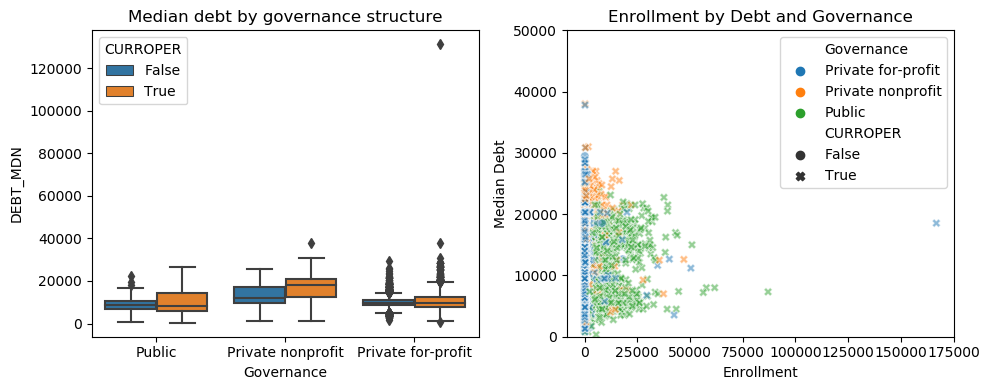

In [143]:
fig=plt.figure(figsize=(10,4), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('Governance', 'DEBT_MDN', data=data, hue = 'CURROPER', order = control_order)
plt.title('Median debt by governance structure')

plt.subplot(1, 2, 2)
sns.scatterplot('UGDS', 'DEBT_MDN', data=data, hue='Governance',  style='CURROPER', alpha=0.5)
plt.xlabel('Enrollment')
plt.ylabel('Median Debt')
plt.title('Enrollment by Debt and Governance')
plt.ylim(0, 50000)
plt.tight_layout()
#plt.show()
#plt.savefig('figures/currentEnrollmentDebtControl.png',bbox_inches='tight')

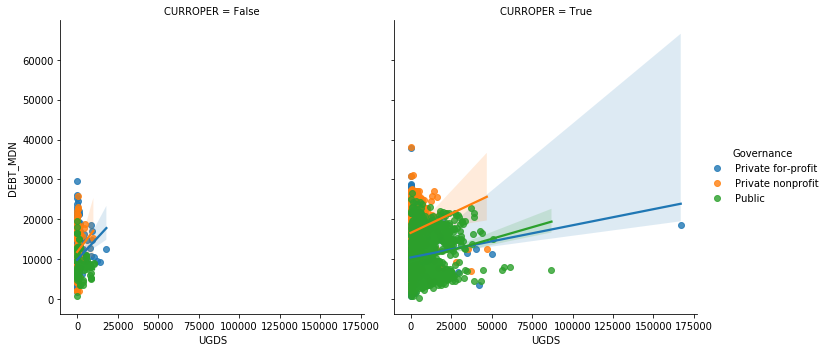

In [144]:
sns.lmplot( x='UGDS', y='DEBT_MDN', data=data , hue='Governance', col='CURROPER')

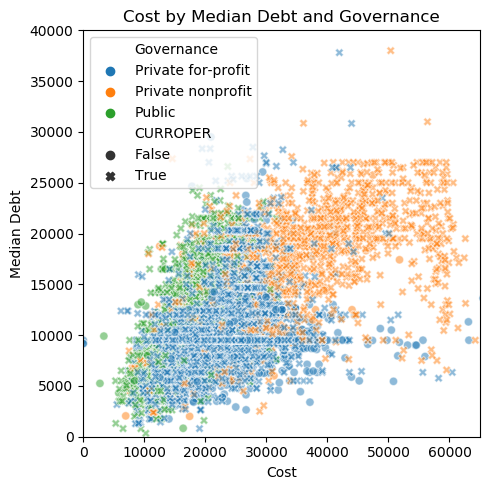

In [145]:
fig=plt.figure(figsize=(5,5), dpi= 100, facecolor='w', edgecolor='k')
sns.scatterplot('Cost', 'DEBT_MDN', data=data, hue='Governance', style='CURROPER', alpha=0.5)
plt.xlabel('Cost')
plt.ylabel('Median Debt')
plt.title('Cost by Median Debt and Governance')
plt.ylim(0, 40000)
plt.xlim(0, 65000)
plt.tight_layout()
#plt.show()
#plt.savefig('figures/currentCostDebtControl.png',bbox_inches='tight')

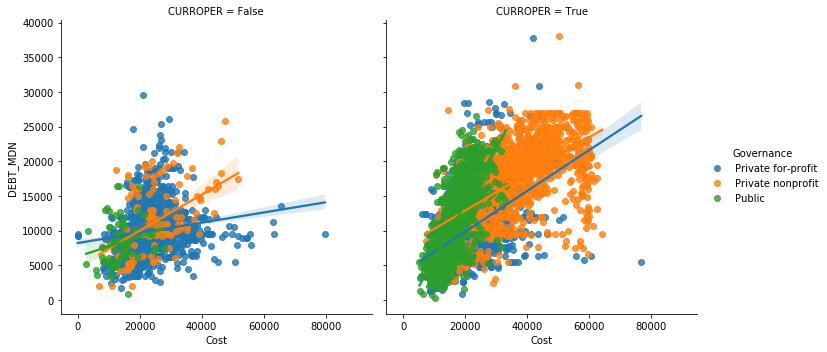

In [146]:
sns.lmplot( x='Cost', y='DEBT_MDN', data=data , hue='Governance', col='CURROPER')

Students at public and private for-profit schools have almost identical median debt levels. Private nonprofit schools have much higher median debt levels.

### Federal Loan

In [147]:
data.PCTFLOAN.groupby(data.CONTROL).mean()

CONTROL
1    0.329981
2    0.558402
3    0.648009
Name: PCTFLOAN, dtype: float64

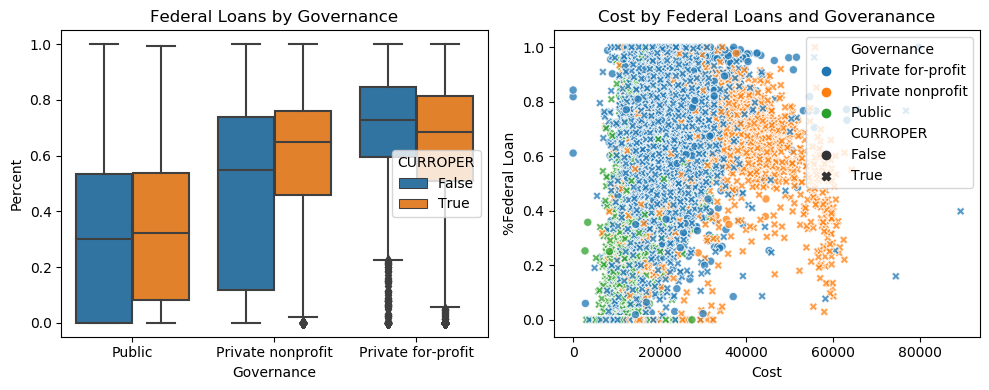

In [148]:
fig=plt.figure(figsize=(10,4), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('Governance', 'PCTFLOAN', data=data, hue = 'CURROPER', order=control_order)
plt.ylabel('Percent')
plt.title('Federal Loans by Governance')

plt.subplot(1, 2, 2)
sns.scatterplot('Cost','PCTFLOAN', data=data, hue='Governance', style='CURROPER', alpha=0.75)
plt.ylabel('%Federal Loan')
plt.xlabel('Cost')
plt.title('Cost by Federal Loans and Goveranance')
plt.tight_layout()
#plt.show()
#plt.savefig('figures/currentFedLoanCostControl.png',bbox_inches='tight')

Text(0.5, 1.0, 'Percent Federal Loans by Cost')

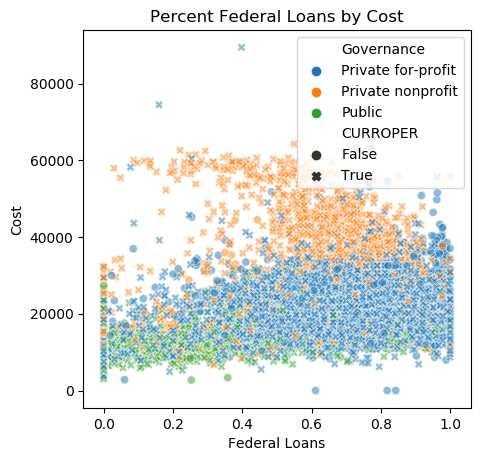

In [149]:
# Federal loans by NetPrice and Cost
fig=plt.figure(figsize=(5,5), dpi= 100, facecolor='w', edgecolor='k')
sns.scatterplot('PCTFLOAN', 'Cost', data=data, hue='Governance', style='CURROPER', alpha=0.5)
plt.xlabel('Federal Loans')
plt.ylabel('Cost')
plt.title('Percent Federal Loans by Cost')

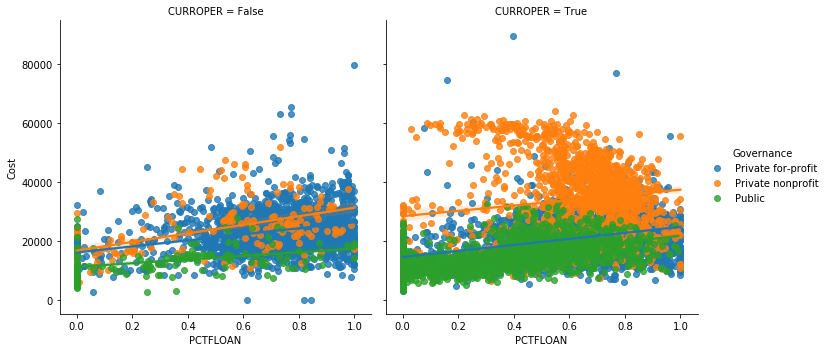

In [150]:
sns.lmplot( x='PCTFLOAN', y='Cost', data=data , hue='Governance', col='CURROPER')

### Completion, Withdrawn, Still enrolled
The first tables show the means for just the closed schools. The boxplots show the entire dataset.

In [151]:
closed.COMP_ORIG_YR4_RT.groupby(closed.CONTROL).mean()

CONTROL
1    0.217799
2    0.436290
3    0.485202
Name: COMP_ORIG_YR4_RT, dtype: float64

In [152]:
closed.WDRAW_ORIG_YR4_RT.groupby(closed.CONTROL).mean()

CONTROL
1    0.162049
2    0.140381
3    0.248279
Name: WDRAW_ORIG_YR4_RT, dtype: float64

In [153]:
closed.ENRL_ORIG_YR4_RT.groupby(closed.CONTROL).mean()

CONTROL
1    0.029678
2    0.016783
3    0.009596
Name: ENRL_ORIG_YR4_RT, dtype: float64

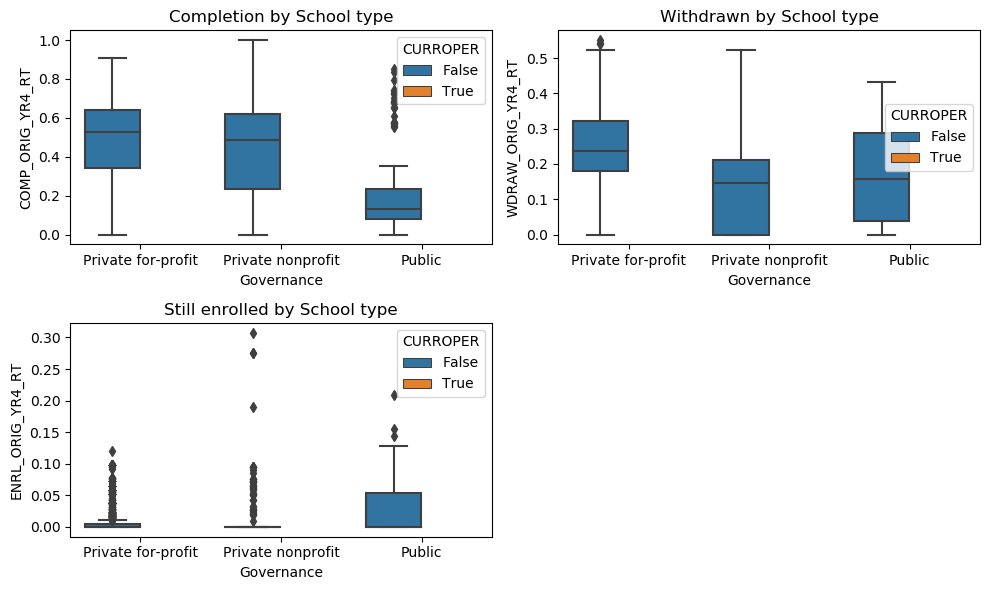

In [154]:
fig=plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(2, 2, 1)
sns.boxplot('Governance', 'COMP_ORIG_YR4_RT', data=data, hue = 'CURROPER')
plt.title('Completion by School type')

plt.subplot(2, 2, 2)
sns.boxplot('Governance', 'WDRAW_ORIG_YR4_RT', data=data, hue = 'CURROPER')
plt.title('Withdrawn by School type')

plt.subplot(2, 2, 3)
sns.boxplot('Governance', 'ENRL_ORIG_YR4_RT', data=data, hue = 'CURROPER')
plt.title('Still enrolled by School type')
plt.tight_layout()
#plt.show()

It appears that this data was not collected for the most recent year's data (2013), since data is only avaiable for closed schools, which are taken from  years before 2013.

### Completion and Retention Rates

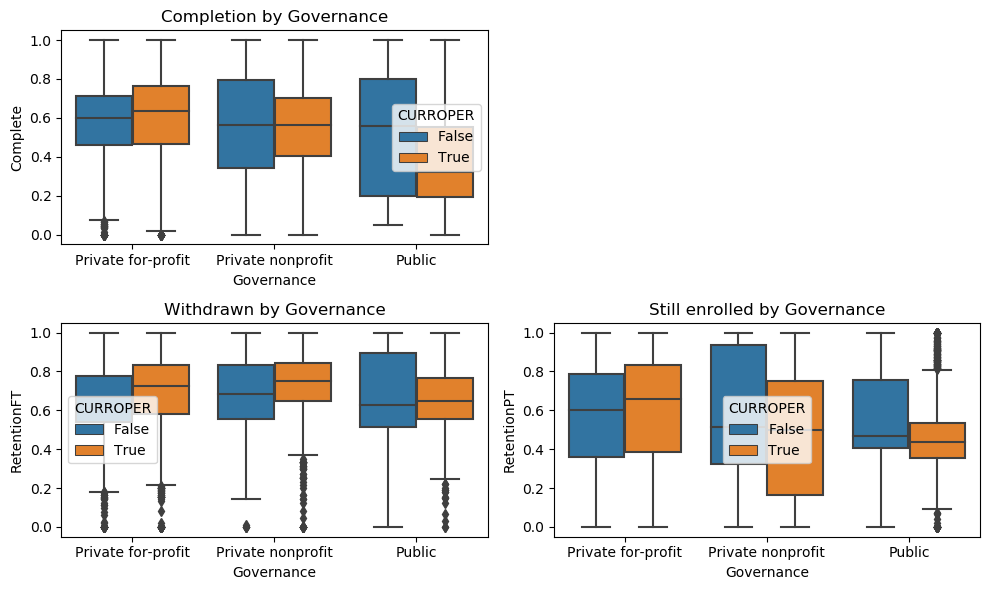

In [155]:
fig=plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(2, 2, 1)
sns.boxplot('Governance', 'Complete', data=data, hue = 'CURROPER')
plt.title('Completion by Governance')

plt.subplot(2, 2, 3)
sns.boxplot('Governance', 'RetentionFT', data=data, hue = 'CURROPER')
plt.title('Withdrawn by Governance')

plt.subplot(2, 2, 4)
sns.boxplot('Governance', 'RetentionPT', data=data, hue = 'CURROPER')
plt.title('Still enrolled by Governance')
plt.tight_layout()
#plt.show()

## CURROPER by school and year

In [156]:
year_pivot = data.pivot_table(index='Year', columns='CURROPER', aggfunc='size')
print(year_pivot)

CURROPER  False   True 
Year                   
2010      932.0     NaN
2011      794.0     NaN
2012      670.0     NaN
2013      363.0  7441.0


In [157]:
closed_2013 = data.loc[(data.Year==2013)&(data.CURROPER==0)]
closed_2013.shape

(363, 32)

In [158]:
everest = data.loc[data.INSTNM =='everest college-phoenix']
everest.head()

OPEID                   INSTNM     CITY  NUMBRANCH PREDDEG HIGHDEG  \
0     02295000  everest college-phoenix  Phoenix          2       1       3   
932        NaN  everest college-phoenix  Phoenix          2       2       3   
2465       NaN  everest college-phoenix  Phoenix          2       2       3   

     CONTROL region  ADM_RATE    UGDS  ...  NetPrice     Cost    PREDDEG_N  \
0          3    6.0    0.4465  5662.0  ...       NaN  29445.0  Certificate   
932        3    6.0       NaN  2254.0  ...   26004.0  30946.0   Associates   
2465       3    6.0       NaN  2761.0  ...   20126.0  25089.0   Associates   

              Governance  EnrollmentBins  TuitionBins  ExpenditureBins  \
0     Private for-profit              xl      highest             high   
932   Private for-profit              xl      highest             high   
2465  Private for-profit              xl      highest             high   

      Complete  RetentionFT  RetentionPT  
0       0.4075       0.4333          0.0  
932     0.4123       0.4324          0.0  
2465    0.3175          NaN          1.0  

[3 rows x 32 columns]

# Feature Engineering and Selection

## Exploration of missing values

The data set contains several categorical features which, while helpful for identifying individual schools (like OPEID and INSTNM), I don't think will be useful or desireable for including in a model.

Also, several of the columns have a large number of null values, which will make them less usefull for model building.

In [159]:
data.isnull().sum() / data.shape[0]

OPEID                0.908627
INSTNM               0.000000
CITY                 0.000000
NUMBRANCH            0.000000
PREDDEG              0.000000
HIGHDEG              0.000000
CONTROL              0.000000
region               0.000000
ADM_RATE             0.755784
UGDS                 0.090784
CURROPER             0.000000
TUITFTE              0.057353
INEXPFTE             0.057353
AVGFACSAL            0.455294
PFTFAC               0.520098
PCTFLOAN             0.096667
UG25abv              0.240882
COMP_ORIG_YR4_RT     0.809608
WDRAW_ORIG_YR4_RT    0.815784
ENRL_ORIG_YR4_RT     0.852059
DEBT_MDN             0.150000
Year                 0.000000
NetPrice             0.203431
Cost                 0.150882
PREDDEG_N            0.000000
Governance           0.000000
EnrollmentBins       0.092549
TuitionBins          0.060784
ExpenditureBins      0.058824
Complete             0.197549
RetentionFT          0.200784
RetentionPT          0.548333
dtype: float64

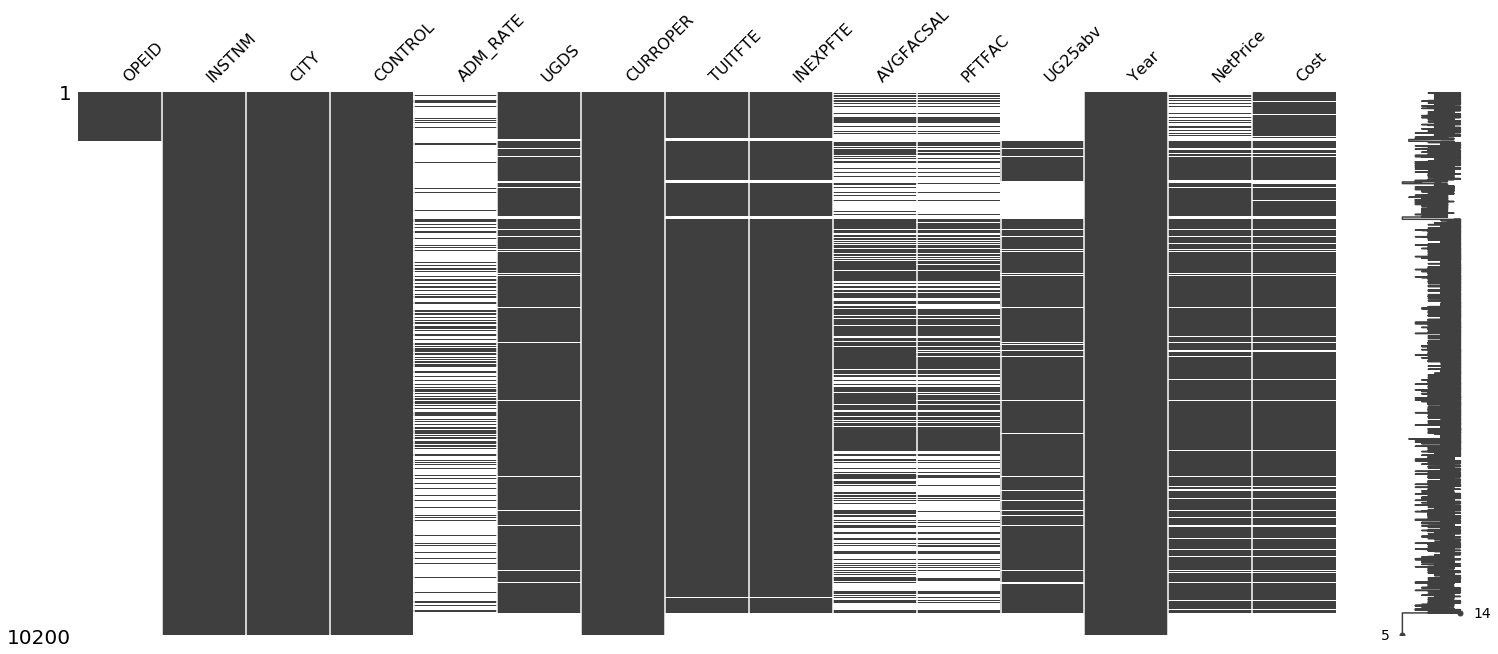

In [160]:
import missingno as msno
df = data[['OPEID', 'INSTNM', 'CITY', 'CONTROL', 'ADM_RATE', 'UGDS', 'CURROPER', 'TUITFTE', 'INEXPFTE', 'AVGFACSAL', 'PFTFAC', 'UG25abv', 'Year', 'NetPrice', 'Cost']]
msno.matrix(df)

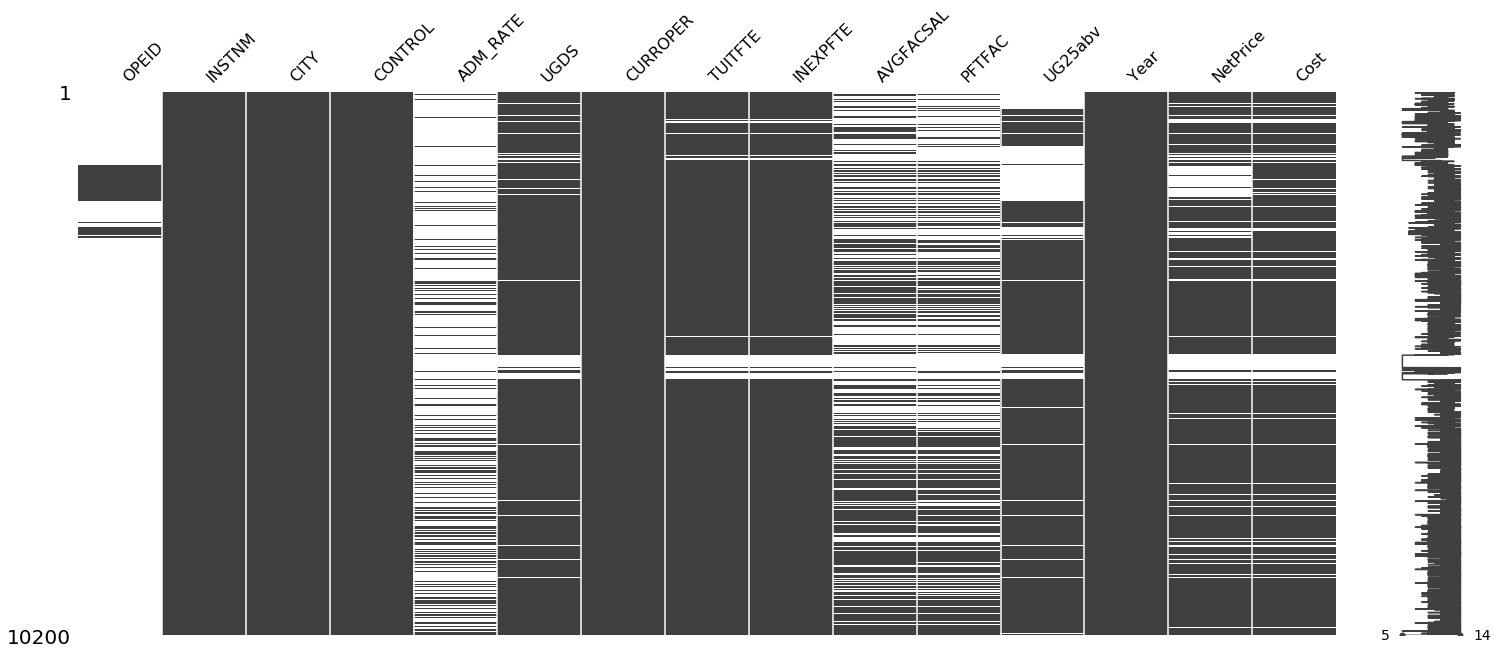

In [161]:
# Are there any systematic differences between data 
# reported for closed vs open institutions?
df_sorted = df.sort_values(by=['CURROPER'])
msno.matrix(df_sorted)

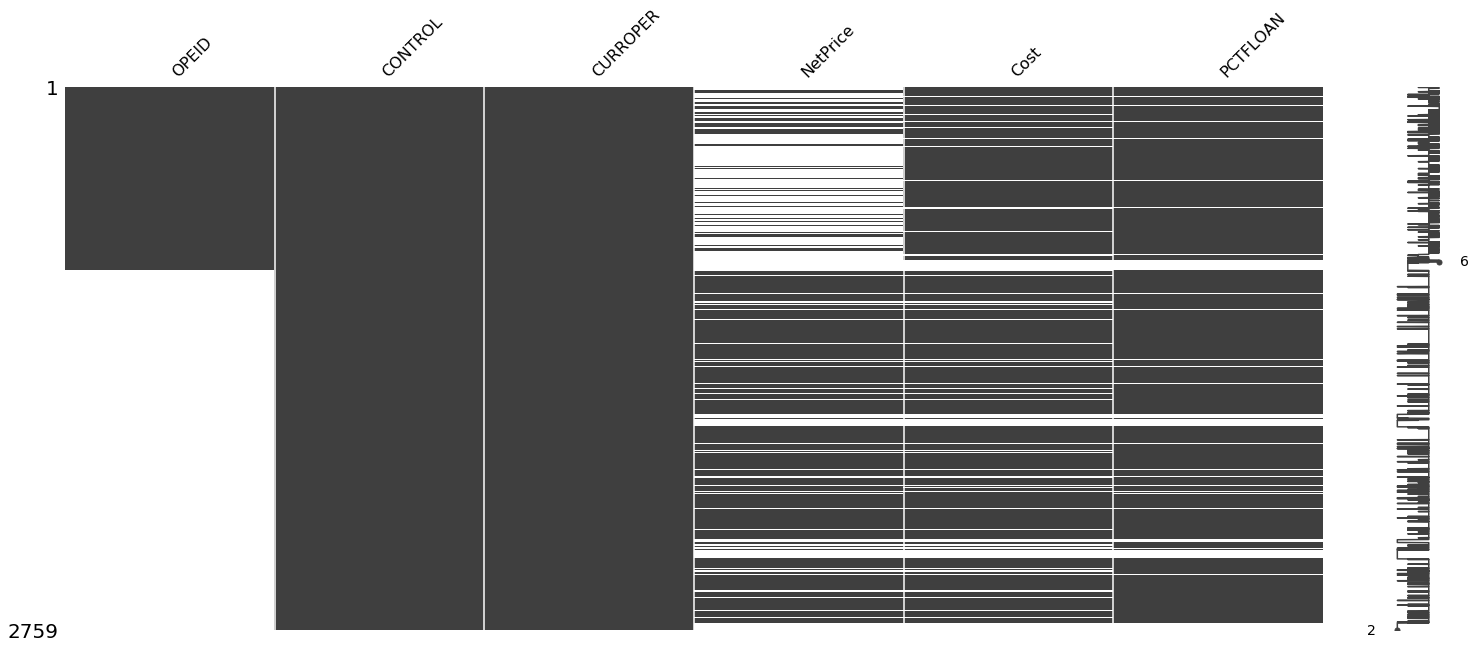

In [162]:
closed_sorted = closed[['OPEID', 'CONTROL', 'CURROPER', 'NetPrice', 'Cost', 'PCTFLOAN']]

msno.matrix(closed_sorted)

The UG25abv colum seems to be missing data every other year - according to the metadata, this information is provided every other year. Missing values could be easily imputed (via forward or backward fill) for each individual institution.

## Impute missing values - using all columns
While there are several categorical columns I intend to drop before the final analysis (like institution name and OPEID number), this information will be useful for imputing missing values is some columns. The plan is to impute the missing values, then drop the categorical columns.

In [163]:
# Fill missing OPEID values value from institution of the same name
# Else fill with 'Other'
print(data.OPEID.isnull().sum())
data['OPEID'] = data.groupby('INSTNM')['OPEID'].ffill()
data['OPEID'] = data.OPEID.fillna('Other')
print(data.OPEID.isnull().sum())

9268
0


In [164]:
# Fill missing CONTROL values from instituions of the same OPEID
print(data.CONTROL.isnull().sum())
data['CONTROL'] = data.groupby(['INSTNM'])['CONTROL'].ffill()
data['CONTROL'] = data.groupby(['OPEID', ])['CONTROL'].ffill()
print(data.CONTROL.isnull().sum())

0
0


In [165]:
# Fill missing UGDS values from institutions of the same name & OPEID, else impute with median from control and degree
# data.loc[data['UGDS'].isnull()]
print(data.UGDS.isnull().sum())
data['UGDS'] = data.groupby(['INSTNM'])['UGDS'].ffill()
print(data.UGDS.isnull().sum())
data['UGDS'] = data.groupby(['OPEID'])['UGDS'].ffill()
print(data.UGDS.isnull().sum())
data['UGDS'] = data.groupby(['CONTROL', 'PREDDEG'])['UGDS'].apply(lambda x: x.fillna(x.median()))
print(data.UGDS.isnull().sum())

926
853
148
0


In [166]:
# Impute UG25abv. First, sort by school and year. Then forward fill.
print(data.UG25abv.isnull().sum())
data.sort_values(by = ['OPEID', 'INSTNM', 'Year'], inplace=True)
data.UG25abv.fillna(method='ffill', inplace=True)
data['UG25abv']=data.groupby(['CONTROL','PREDDEG'])['UG25abv'].apply(lambda x: x.fillna(x.median()))
print(data.UG25abv.isnull().sum())

2457
0


In [167]:
# Impute TUITFTE columns with median values from groups
print(data.TUITFTE.isnull().sum())
data['TUITFTE']=data.groupby(['INSTNM', 'OPEID'])['TUITFTE'].ffill()
data['TUITFTE']=data.groupby(['CONTROL','PREDDEG'])['TUITFTE'].apply(lambda x: x.fillna(x.median()))
print(data.TUITFTE.isnull().sum())

585
0


In [168]:
# Impute INEXPFTE columns with median values from groups
print(data.INEXPFTE.isnull().sum())
data['INEXPFTE']=data.groupby(['INSTNM', 'OPEID'])['INEXPFTE'].ffill()
data['INEXPFTE']=data.groupby(['CONTROL','PREDDEG'])['INEXPFTE'].apply(lambda x: x.fillna(x.median()))
print(data.INEXPFTE.isnull().sum())

585
0


In [169]:
# Impute Net Price and Cost - since previous years values are missing, we'll try backfill
print(data.NetPrice.isnull().sum())
data['NetPrice']=data.groupby(['INSTNM', 'OPEID'])['NetPrice'].bfill()
data['NetPrice']=data.groupby(['CONTROL','PREDDEG'])['NetPrice'].apply(lambda x: x.fillna(x.median()))
print(data.NetPrice.isnull().sum())

2075
292


Some schools are publically controlled schools that offer predominatly graduate degrees, and there are not prices/costs listed for any schools with this combination of features. I'm going to impute these values from other institutions that primarily offer graduate degrees

In [170]:
data['NetPrice']= data.groupby(['PREDDEG'])['NetPrice'].apply(lambda x: x.fillna(x.median()))
print(data.NetPrice.isnull().sum())

0


In [171]:
print(data.Cost.isnull().sum())
data['Cost']=data.groupby(['INSTNM', 'OPEID'])['Cost'].bfill()
data['Cost']=data.groupby(['CONTROL','PREDDEG'])['Cost'].apply(lambda x: x.fillna(x.median()))
print(data.Cost.isnull().sum())
data['Cost'] = data.groupby(['PREDDEG'])['Cost'].apply(lambda x: x.fillna(x.median()))
print(data.Cost.isnull().sum())

1539
16
0


In [172]:
# Impute PFTFAC using ffill, grouped by institution name and id
print(data.PFTFAC.isnull().sum())
data['PFTFAC']=data.groupby(['INSTNM', 'OPEID'])['PFTFAC'].ffill()
print(data.PFTFAC.isnull().sum())
data['PFTFAC']=data.groupby(['CONTROL','PREDDEG'])['PFTFAC'].apply(lambda x: x.fillna(x.median()))
print(data.PFTFAC.isnull().sum())

5305
4982
0


In [173]:
# Impute Median Debt using ffill, grouped by institution name and id
print(data.DEBT_MDN.isnull().sum())
data['DEBT_MDN']=data.groupby(['INSTNM', 'OPEID'])['DEBT_MDN'].ffill()
print(data.DEBT_MDN.isnull().sum())
data['DEBT_MDN']=data.groupby(['CONTROL','PREDDEG'])['DEBT_MDN'].apply(lambda x: x.fillna(x.median()))
print(data.DEBT_MDN.isnull().sum())

1530
1476
0


In [174]:
# Impute Completion Rate using ffill, grouped by institution name and id
print(data.Complete.isnull().sum())
data['Complete']=data.groupby(['INSTNM', 'OPEID'])['Complete'].ffill()
print(data.Complete.isnull().sum())
data['Complete']=data.groupby(['CONTROL','PREDDEG'])['Complete'].apply(lambda x: x.fillna(x.median()))
data['Complete']= data.groupby(['PREDDEG'])['Complete'].apply(lambda x: x.fillna(x.median()))
print(data.Complete.isnull().sum())

2015
1881
0


In [175]:
# Impute Completion Rate using ffill, grouped by institution name and id
print(data.RetentionFT.isnull().sum())
data['RetentionFT']=data.groupby(['INSTNM', 'OPEID'])['RetentionFT'].ffill()
print(data.RetentionFT.isnull().sum())
data['RetentionFT']=data.groupby(['CONTROL','PREDDEG'])['RetentionFT'].apply(lambda x: x.fillna(x.median()))
print(data.RetentionFT.isnull().sum())
data['RetentionFT']=data.groupby(['PREDDEG'])['RetentionFT'].apply(lambda x: x.fillna(x.median()))
print(data.RetentionFT.isnull().sum())

2048
1866
16
0


In [176]:
print(data.COMP_ORIG_YR4_RT.isnull().sum())
data['COMP_ORIG_YR4_RT']=data.groupby(['INSTNM', 'OPEID'])['COMP_ORIG_YR4_RT'].ffill()
print(data.COMP_ORIG_YR4_RT.isnull().sum())
data['COMP_ORIG_YR4_RT']=data.groupby(['CONTROL','PREDDEG'])['COMP_ORIG_YR4_RT'].apply(lambda x: x.fillna(x.median()))
print(data.COMP_ORIG_YR4_RT.isnull().sum())
#data['COMP_ORIG_YR4_RT']=data.groupby(['PREDDEG'])['COMP_ORIG_YR4_RT'].apply(lambda x: x.fillna(x.median()))
#print(data.COMP_ORIG_YR4_RT.isnull().sum())

8258
7631
0


In [177]:
print(data.WDRAW_ORIG_YR4_RT.isnull().sum())
data['WDRAW_ORIG_YR4_RT']=data.groupby(['INSTNM', 'OPEID'])['WDRAW_ORIG_YR4_RT'].ffill()
print(data.WDRAW_ORIG_YR4_RT.isnull().sum())
data['WDRAW_ORIG_YR4_RT']=data.groupby(['CONTROL','PREDDEG'])['WDRAW_ORIG_YR4_RT'].apply(lambda x: x.fillna(x.median()))
print(data.WDRAW_ORIG_YR4_RT.isnull().sum())
#data['COMP_ORIG_YR4_RT']=data.groupby(['PREDDEG'])['COMP_ORIG_YR4_RT'].apply(lambda x: x.fillna(x.median()))
#print(data.COMP_ORIG_YR4_RT.isnull().sum())

8321
7686
0


In [178]:
print(data.ENRL_ORIG_YR4_RT.isnull().sum())
data['ENRL_ORIG_YR4_RT']=data.groupby(['INSTNM', 'OPEID'])['ENRL_ORIG_YR4_RT'].ffill()
print(data.ENRL_ORIG_YR4_RT.isnull().sum())
data['ENRL_ORIG_YR4_RT']=data.groupby(['CONTROL','PREDDEG'])['ENRL_ORIG_YR4_RT'].apply(lambda x: x.fillna(x.median()))
print(data.ENRL_ORIG_YR4_RT.isnull().sum())
#data['COMP_ORIG_YR4_RT']=data.groupby(['PREDDEG'])['COMP_ORIG_YR4_RT'].apply(lambda x: x.fillna(x.median()))
#print(data.COMP_ORIG_YR4_RT.isnull().sum())

8691
8010
0


In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10200 entries, 897 to 5365
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   OPEID              10200 non-null  object  
 1   INSTNM             10200 non-null  object  
 2   CITY               10200 non-null  object  
 3   NUMBRANCH          10200 non-null  int64   
 4   PREDDEG            10200 non-null  category
 5   HIGHDEG            10200 non-null  category
 6   CONTROL            10200 non-null  category
 7   region             10200 non-null  category
 8   ADM_RATE           2491 non-null   float64 
 9   UGDS               10200 non-null  float64 
 10  CURROPER           10200 non-null  bool    
 11  TUITFTE            10200 non-null  float64 
 12  INEXPFTE           10200 non-null  float64 
 13  AVGFACSAL          5556 non-null   float64 
 14  PFTFAC             10200 non-null  float64 
 15  PCTFLOAN           9214 non-null   float64 
 16  UG2

In [180]:
# ## Export processed data
data.to_csv('data/processed/DecisionTreeDataFinal.csv')

## Columns to drop

The data set contains several categorical features which, while helpful for identifying individual schools (like OPEID and INSTNM), I don't think will be useful or desireable for including in a model.

Also, several of the columns have a large number of null values, which will make them less useful for model building.

In [181]:
# Drop Binning columns from dataframe
to_drop = ['OPEID', 'INSTNM', 'CITY', 'HIGHDEG', 'ADM_RATE', 'NetPrice', 'region','EnrollmentBins',\
           'TuitionBins','ExpenditureBins', 'AVGFACSAL', 'RetentionPT', 'PCTFLOAN', 'Governance', 'PREDDEG_N',\
          'COMP_ORIG_YR4_RT', 'WDRAW_ORIG_YR4_RT','ENRL_ORIG_YR4_RT' ]
df = data.drop(to_drop, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10200 entries, 897 to 5365
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   NUMBRANCH    10200 non-null  int64   
 1   PREDDEG      10200 non-null  category
 2   CONTROL      10200 non-null  category
 3   UGDS         10200 non-null  float64 
 4   CURROPER     10200 non-null  bool    
 5   TUITFTE      10200 non-null  float64 
 6   INEXPFTE     10200 non-null  float64 
 7   PFTFAC       10200 non-null  float64 
 8   UG25abv      10200 non-null  float64 
 9   DEBT_MDN     10200 non-null  float64 
 10  Year         10200 non-null  int64   
 11  Cost         10200 non-null  float64 
 12  Complete     10200 non-null  float64 
 13  RetentionFT  10200 non-null  float64 
dtypes: bool(1), category(2), float64(9), int64(2)
memory usage: 986.4 KB


In [182]:
to_dummy_columns = ['PREDDEG', 'CONTROL']
df = pd.get_dummies(df, drop_first=True)
df.sort_index(inplace=True)
df.head()

NUMBRANCH    UGDS  CURROPER  TUITFTE  INEXPFTE  PFTFAC  UG25abv  DEBT_MDN  \
0          2  5662.0     False  19476.0    7148.0  0.7500   0.7000    9495.0   
1          1    86.0     False   8740.0   10208.0  0.4298   0.3636   10556.0   
2          2   149.0     False   9033.0    7898.0  0.4298   0.1336    9864.5   
3          1     2.0     False  49859.0   33004.0  0.6301   0.5258    9500.0   
4          1  1734.0     False   6291.0    1485.0  0.4298   0.4545   13000.0   

   Year     Cost  Complete  RetentionFT  PREDDEG_1  PREDDEG_2  PREDDEG_3  \
0  2010  29445.0    0.4075      0.43330          1          0          0   
1  2010  34124.0    0.4800      0.60870          1          0          0   
2  2010  35121.0    0.7025      0.50000          1          0          0   
3  2010  19623.0    0.7500      0.74085          1          0          0   
4  2010  40920.0    0.5725      0.58750          1          0          0   

   PREDDEG_4  CONTROL_2  CONTROL_3  
0          0          0          1  
1          0          0          1  
2          0          0          1  
3          0          1          0  
4          0          0          1

## Scale the data, then split into training and test sets

In [183]:
names = df.columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [184]:
# Save the whole, processed dataset in one file
data.to_csv('data/processed/DataScaledDummyFinal.csv')

In [185]:
# These steps are repeated in the modeling notebook, too.
y = df['CURROPER']
X = scaled_df.drop('CURROPER', axis=1)

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

In [187]:
# Export imputed data with dummy columns
X_train.to_csv('data/processed/X_train.csv')
X_test.to_csv('data/processed/X_test.csv')
y_train.to_csv('data/processed/y_train.csv')
y_test.to_csv('data/processed/y_test.csv')